In [1]:
#ElhamMirzaei3
#Import the necessary modules for clustering
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-dataset/Customer_ Dataset.csv


### Impoting required libraries 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [3]:
Data = pd.read_csv('/kaggle/input/customer-dataset/Customer_ Dataset.csv')
df= pd.DataFrame(Data)
df

Cust_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

### Reviewing Dataset

In [4]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Cust_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Making sure no duplicate data exists

In [6]:
df.duplicated().sum()


0

In [7]:
df.drop('Cust_ID', axis=1, inplace = True)

### Noise detection


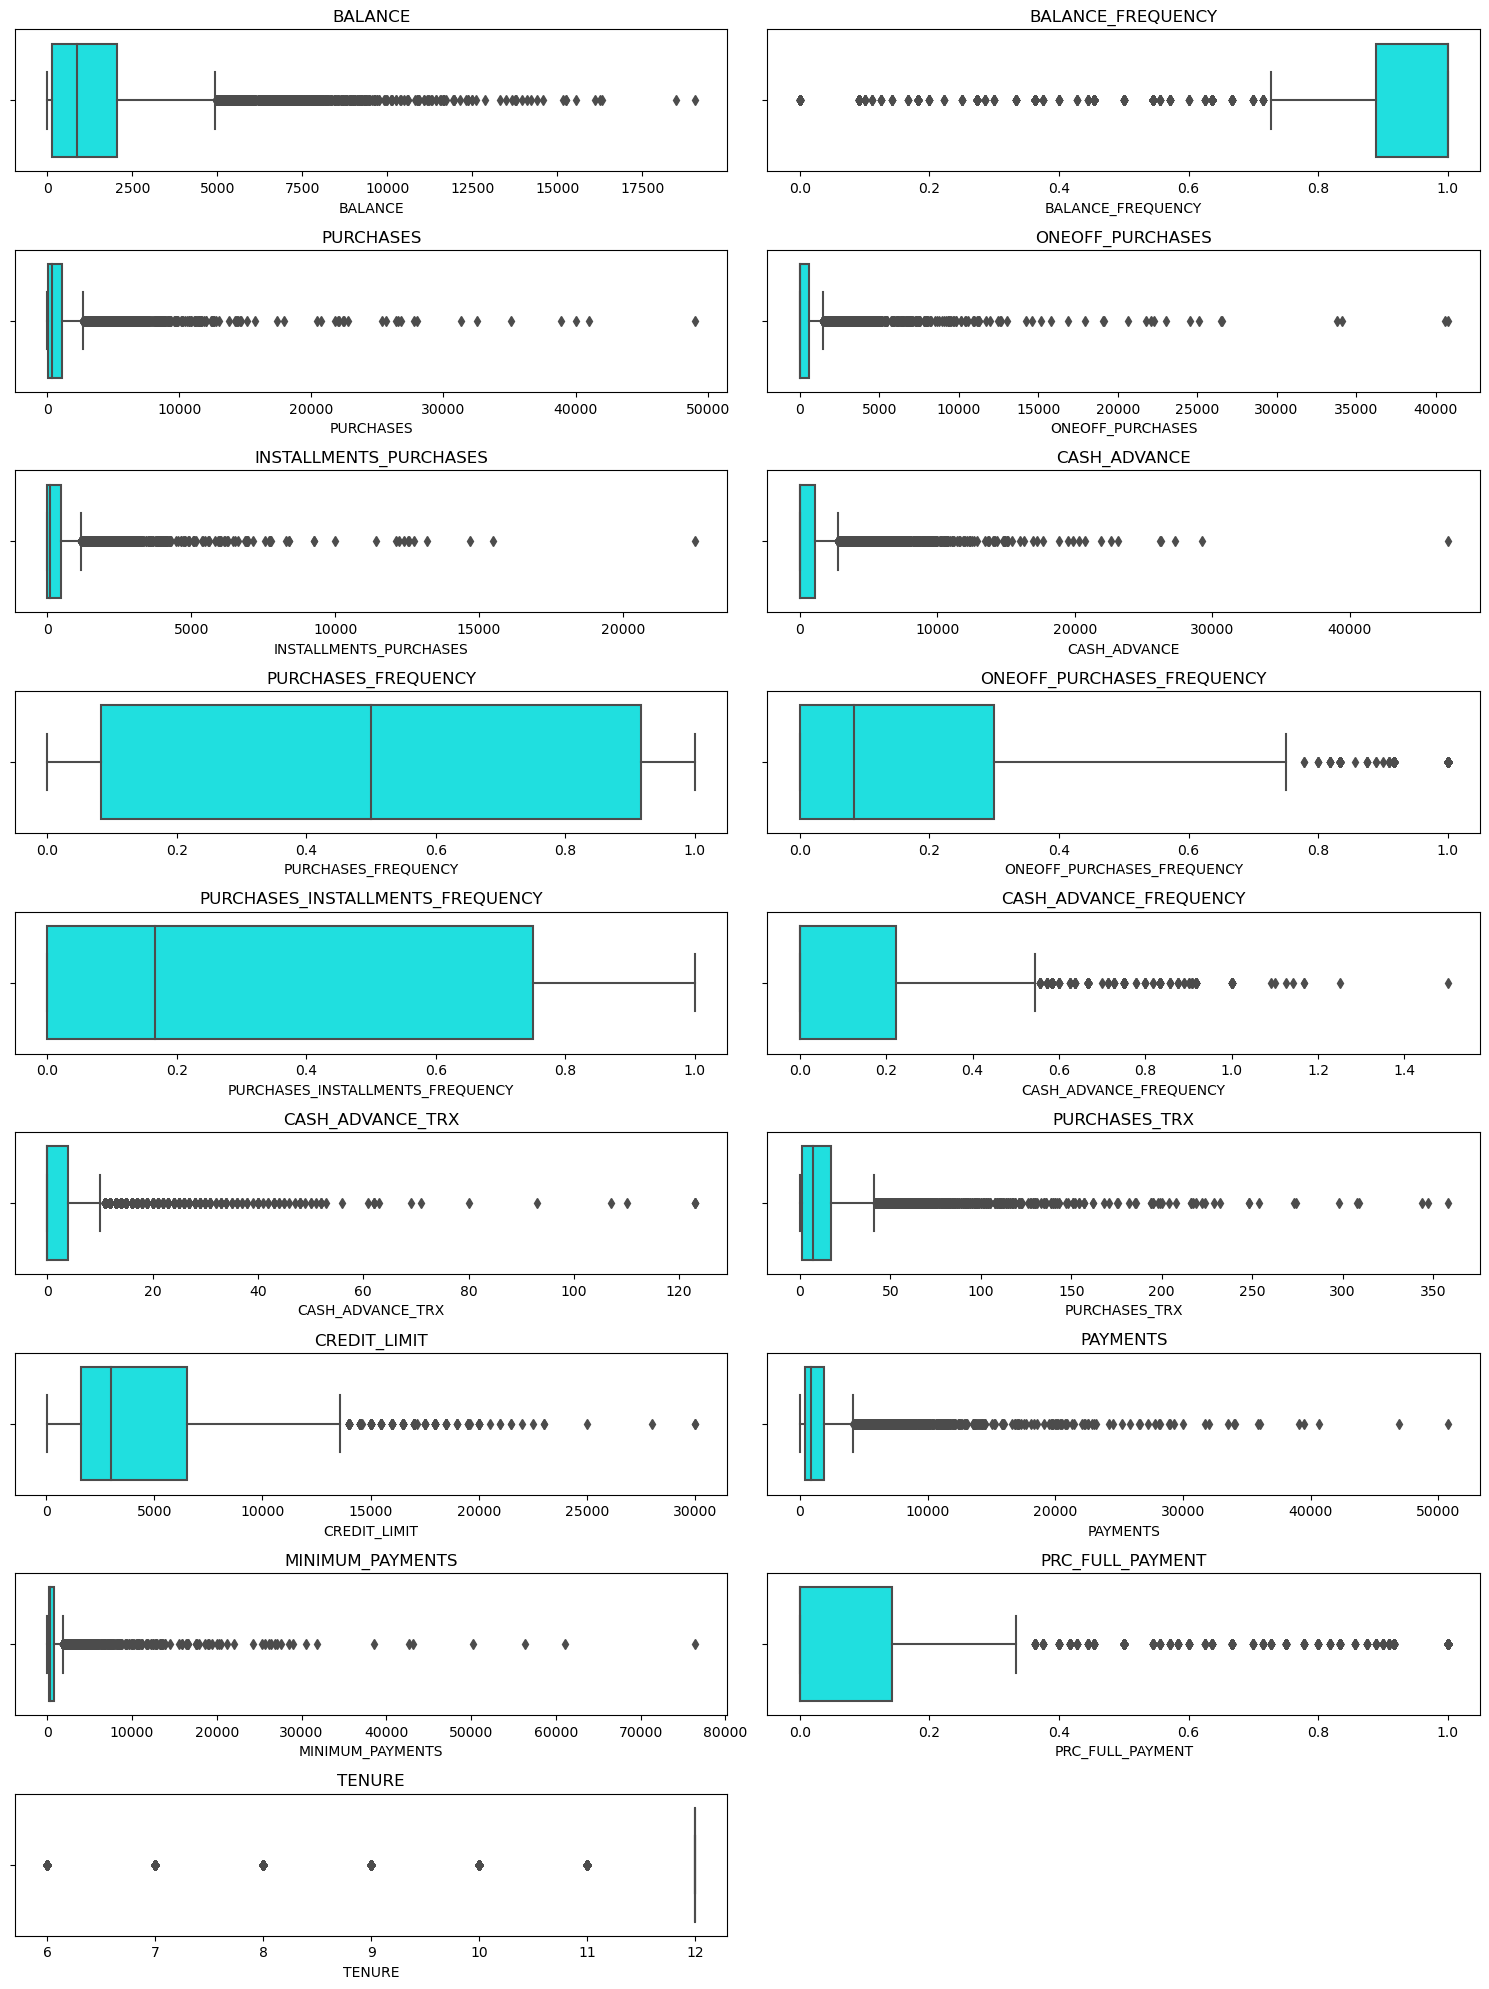

In [8]:
Numerical = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
plt.figure(figsize=(15,20))
for i, col in enumerate (df.columns):
    ax= plt.subplot(9,2,i+1)
    sns.boxplot(x= Numerical[i], data=df, color='cyan' )
    plt.title(df.columns[i])
    plt.tight_layout()
plt.show()

### Detecting Outliers

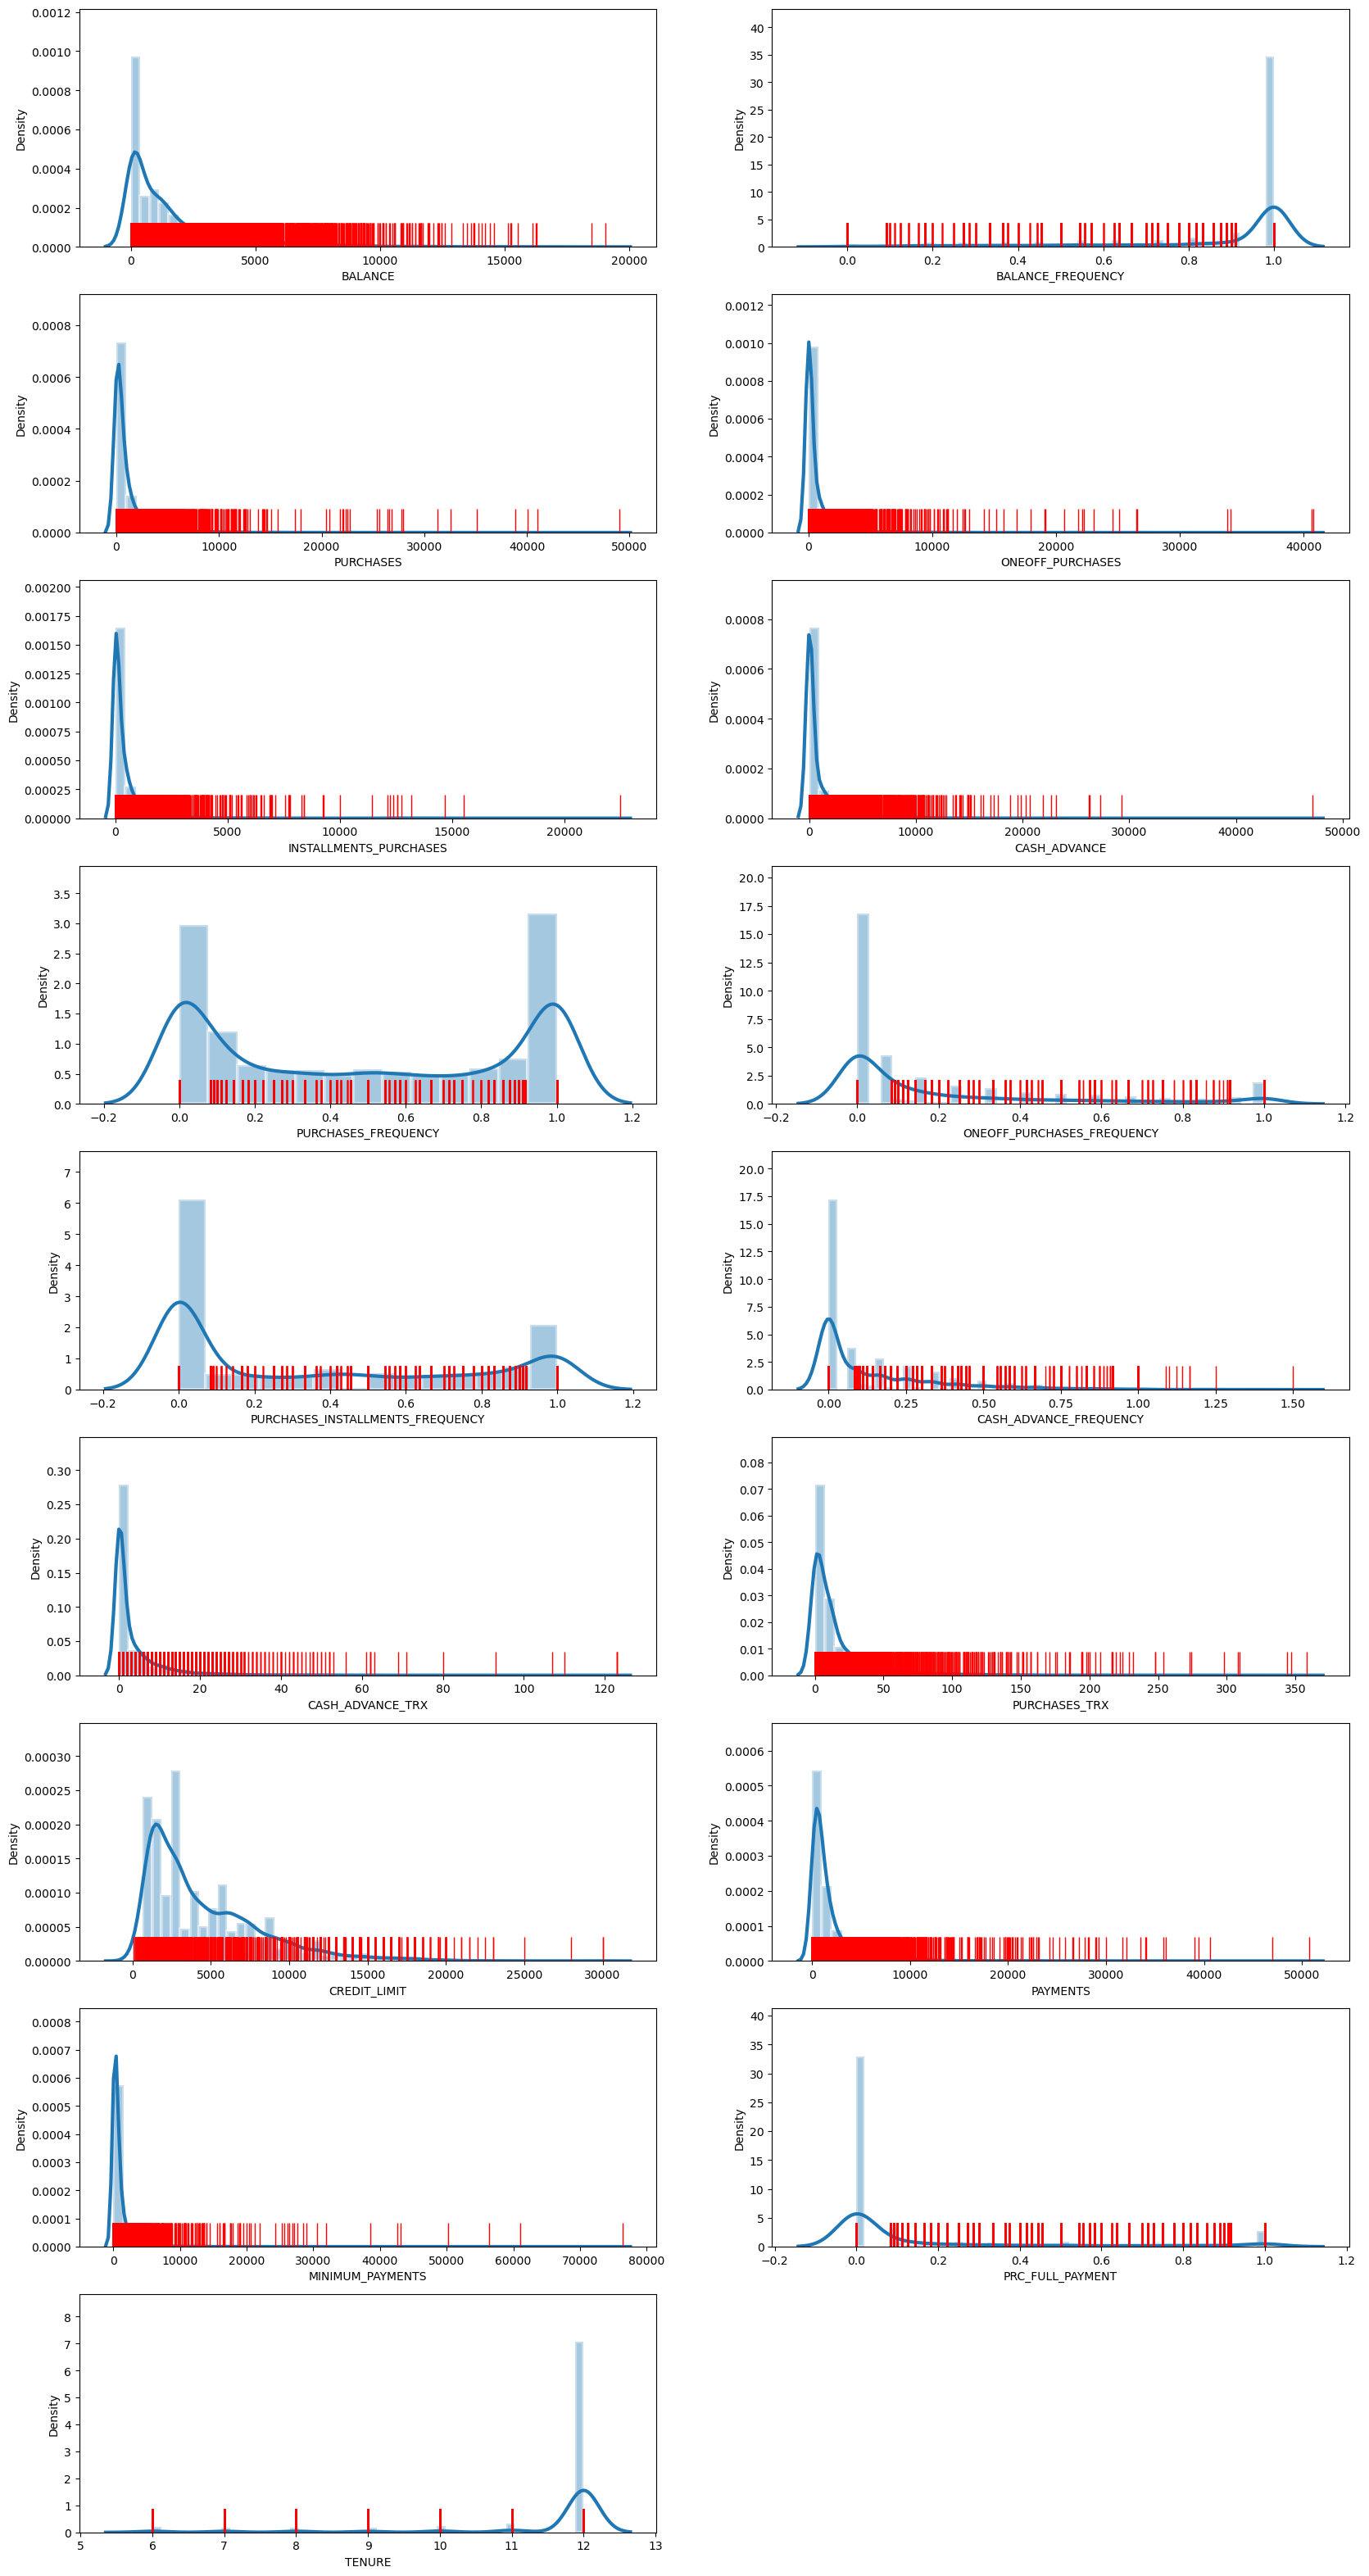

In [9]:
i=1
plt.figure(figsize= (20,40))
for col in df.columns:
    plt.subplot(9,2,i)
    sns.distplot(df[col], hist=True , hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})
#This function combines the matplotlib hist function with the seaborn kdeplot()
    sns.rugplot(df[col], height=.1, clip_on=False, color='red')#This function is intended to complement other plots by showing the location of individual observations
    i=i+1
plt.show()

### Cheking features_data types and their count of null

In [10]:
data_types = pd.DataFrame(df.dtypes, columns=['Data Types'])
count_of_nulls = pd.DataFrame(df.isnull().sum(), columns=['Count of Nulls'])

Check_data = pd.concat([data_types, count_of_nulls], axis='columns')
Check_data

Data Types  Count of Nulls
BALANCE                             float64               0
BALANCE_FREQUENCY                   float64               0
PURCHASES                           float64               0
ONEOFF_PURCHASES                    float64               0
INSTALLMENTS_PURCHASES              float64               0
CASH_ADVANCE                        float64               0
PURCHASES_FREQUENCY                 float64               0
ONEOFF_PURCHASES_FREQUENCY          float64               0
PURCHASES_INSTALLMENTS_FREQUENCY    float64               0
CASH_ADVANCE_FREQUENCY              float64               0
CASH_ADVANCE_TRX                      int64               0
PURCHASES_TRX                         int64               0
CREDIT_LIMIT                        float64               1
PAYMENTS                            float64               0
MINIMUM_PAYMENTS                    float64             313
PRC_FULL_PAYMENT                    float64               0
TENURE                                int64               0

### Missing values aren't alot, so we drop them.

In [11]:
df.dropna(inplace = True)
df.reset_index( inplace = True)
df.drop('index',axis=1,inplace = True)
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3      678.334763        244.791237          0.000000      12  
4     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8631    58.644883         43.473717          0.000000       6  
8632   325.594462         48.886365          0.500000       6  
8633    81

### Visualizing some features

[Text(0, 0, '184'),
 Text(0, 0, '177'),
 Text(0, 0, '183'),
 Text(0, 0, '164'),
 Text(0, 0, '226'),
 Text(0, 0, '356'),
 Text(0, 0, '7346')]

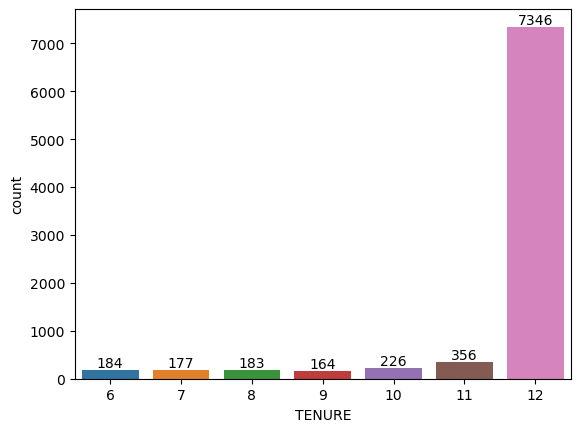

In [12]:
ax = sns.countplot(x=df['TENURE'])
ax.bar_label(ax.containers[0], fontsize=10, color='black')


<AxesSubplot:xlabel='TENURE', ylabel='CREDIT_LIMIT'>

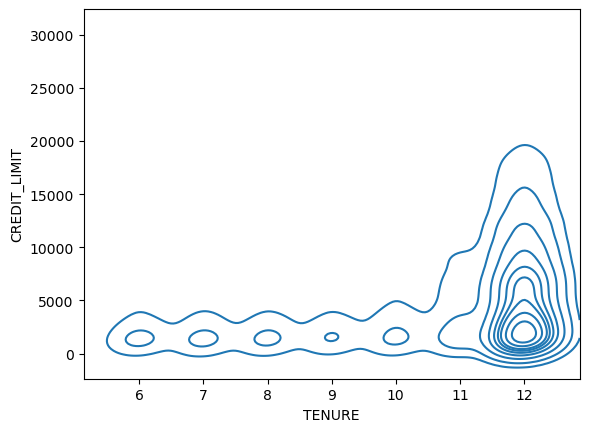

In [13]:
sns.kdeplot(x = 'TENURE', y = 'CREDIT_LIMIT', data = df,palette='Pastel1')


<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

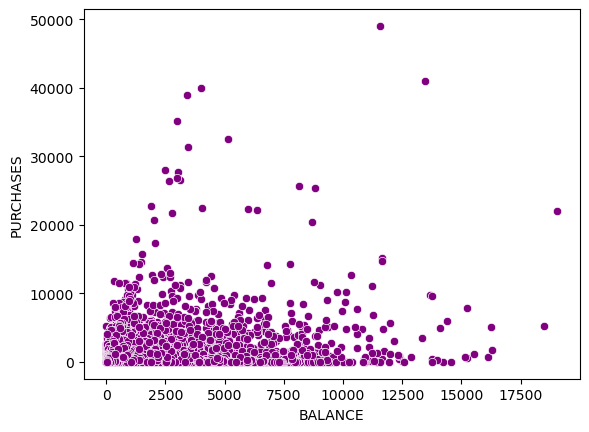

In [14]:
sns.scatterplot(x='BALANCE', y='PURCHASES', data=df,color='purple')

<AxesSubplot:xlabel='PURCHASES_FREQUENCY', ylabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

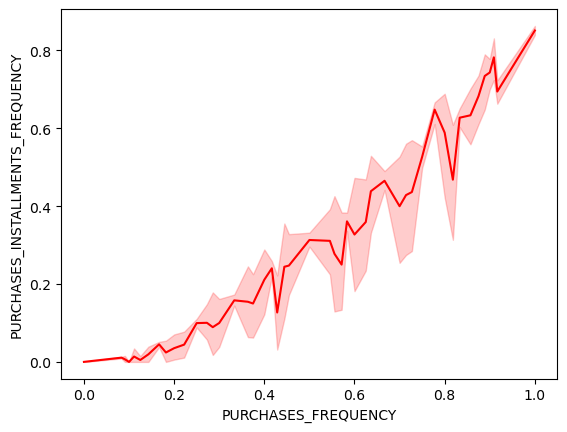

In [15]:
sns.lineplot(x='PURCHASES_FREQUENCY', y='PURCHASES_INSTALLMENTS_FREQUENCY', data=df,color='red')

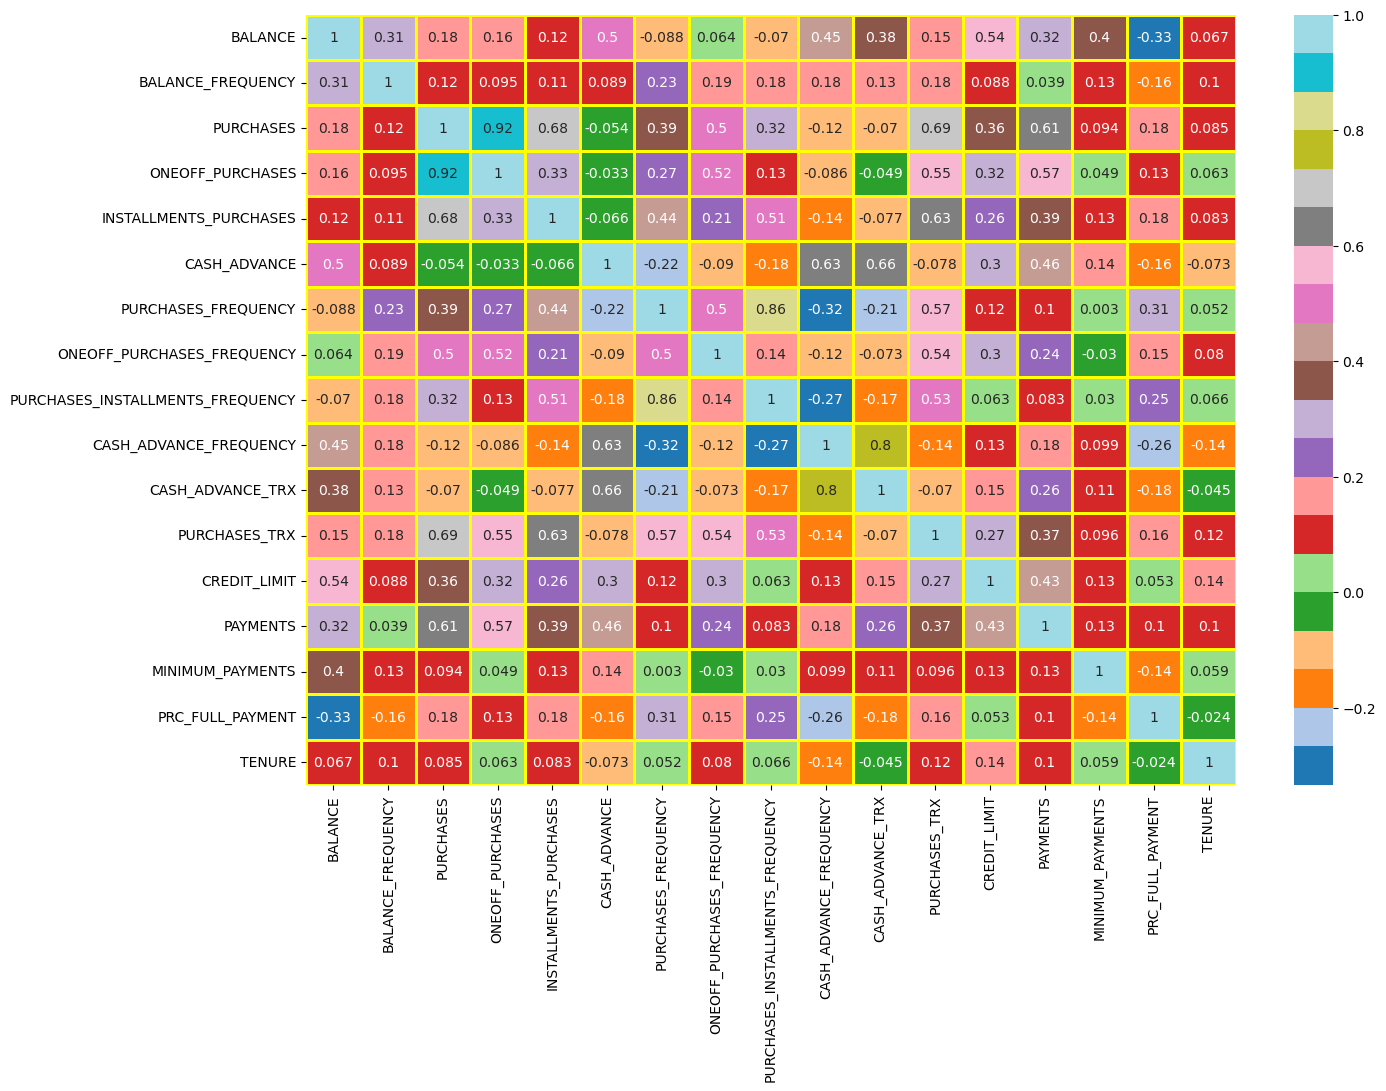

In [16]:
#All features corrolation

plt.figure(figsize = (15,10))
linewidths = 1
linecolor = "yellow"
sns.heatmap(df.corr(), xticklabels = df.columns,yticklabels = df.columns
           , annot = True , cmap="tab20",linewidths=linewidths, linecolor=linecolor)
plt.show()

### Normalize all features

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

### K-means 

K-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable.

In [18]:
List = []
for k in range(1,11):#this range is optional
    kmeans = KMeans(n_clusters=k, init= "random",max_iter = 300, random_state = 1, n_init = 10) 
    kmeans.fit(scaled_features)
    List.append(kmeans.inertia_)

### Elbow method

Elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.

In [19]:
!pip install kneed


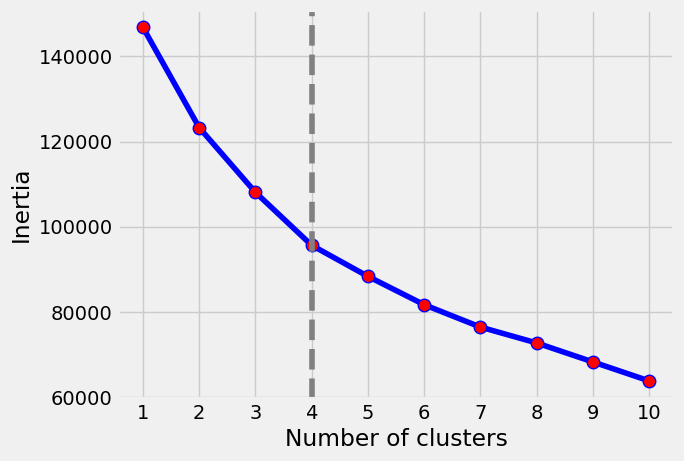

In [20]:
from kneed import KneeLocator, DataGenerator
kl = KneeLocator(range(1, 11), List, curve = 'convex', direction = 'decreasing')
kl.elbow

plt.style.use('fivethirtyeight')
plt.plot(range(1, 11), List, marker = 'o', c='b',  ms = 9, mfc = 'r')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.axvline(x=kl.elbow, color ='gray', label = 'axvline - full height', ls = '--')

plt.show()

### Evaluation model by Silhouette Score


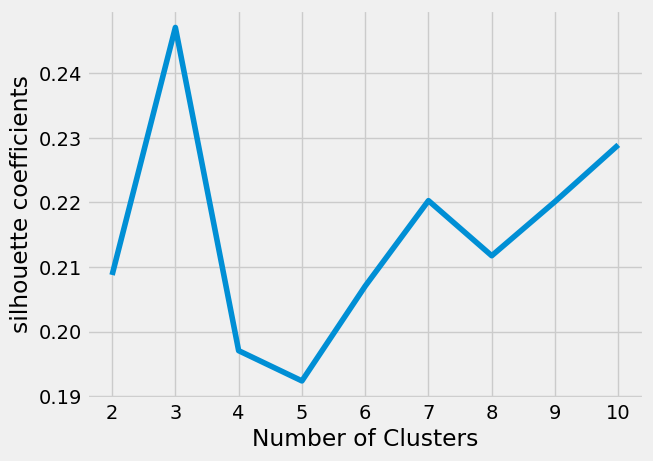

In [21]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()

In [22]:
max(silhouette_coefficients)


0.24709726016009056

### Computing the Calinski and Harabasz score.

It is also known as the Variance Ratio Criterion.

The score is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion.

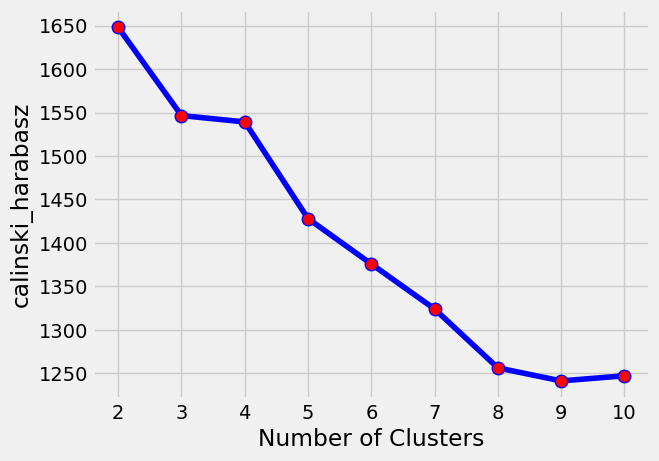

In [23]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
calinski_harabaz = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(scaled_features)
    metrics.calinski_harabasz_score(scaled_features, kmeans.labels_)
    calinski_harabaz.append(metrics.calinski_harabasz_score(scaled_features, kmeans.labels_))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz,marker = 'o', c = 'b', ms = 9, mfc = 'r')
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

In [24]:
max(calinski_harabaz)

1647.931477221298

### As we can see, 3 clusters with silhouette score = 0.24709726016009056, is the best for k-mean modeling

In [25]:
kmeans = KMeans(n_clusters=3,init= "random", random_state = 1)
kmeans.fit(scaled_features)
labels = kmeans.labels_

In [26]:
# Viewing cluster centers (normalized centers, here there are negative numbers)
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  1.145171          0.312521 -0.296682        -0.212560   
1 -0.370274         -0.170479 -0.233299        -0.204393   
2  0.308067          0.419872  1.512495         1.263769   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.310883     1.360100           -0.656780   
1              -0.175853    -0.312871           -0.058510   
2               1.253044    -0.247855            1.133379   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.317302                        -0.563171   
1                  -0.232819                        -0.047603   
2                   1.536870                         0.959426   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               1.539607         1.323633     -0.374920     0.593281   
1              -0.337233        -0.301960     -0.244794    -0.342769   
2              -0.362451        -0.253407      1.669393     0.889624   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  0.438286         0.399018        -0.424843 -0.136670  
1 -0.287986        -0.139703         0.016660 -0.024476  
2  0.825350         0.159024         0.469511  0.295338

In [27]:
# Viewing real centers (now we don't see negative numbers)
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  4000.872625          0.959941   382.530089       246.904994   
1   825.333664          0.859629   519.878185       260.660761   
2  2246.763523          0.982236  4302.983675      2733.354013   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             135.703967  3879.404880            0.232467   
1             259.552571   330.471258            0.472523   
2            1570.125120   468.392079            0.950768   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.110707                         0.144639   
1                   0.136055                         0.349871   
2                   0.667025                         0.750739   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.448266        12.463010      5.593112  6692.923817   
1               0.069557         1.226737      8.869558  3267.888610   
2               0.064469         1.562345     57.066887  7777.250206   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  3059.733262      1810.947120         0.033442  11.355230  
1   946.543163       532.870304         0.164239  11.502305  
2  4185.951945      1241.578059         0.298398  11.921552

In [28]:
# Adding cluster column to dataframe
df_cluster_with_kmean = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_kmean

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        1  
1     4103.032597       1072.340217          0.222222      12        0  
2      622.066742        627.284787          0.000000      12        1  
3      678.334763        244.791237          0.000000      12        1  
4     1400.057770       2407.246035          0.000000      12        1  
...           ...               ...               ...     ...      ...  
8631    58.644883         43.473717          0.000000       6        1  
86

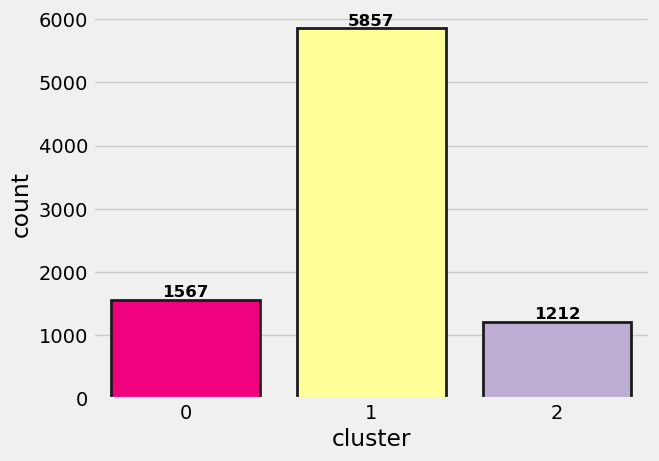

In [29]:
ax = sns.countplot(x=df_cluster_with_kmean.cluster, palette='Accent_r', saturation=1, edgecolor = "#1c1c1c", linewidth = 2)#adding cluster column to dataframe
df_cluster_with_kmean = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_kmean
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.show()

### Visualizing clusters by inversing results


[[4.00087262e+03 9.59940895e-01 3.82530089e+02 2.46904994e+02
  1.35703967e+02 3.87940488e+03 2.32467442e-01 1.10706643e-01
  1.44639001e-01 4.48265681e-01 1.24630102e+01 5.59311224e+00
  6.69292382e+03 3.05973326e+03 1.81094712e+03 3.34421601e-02
  1.13552296e+01]
 [8.25333664e+02 8.59629163e-01 5.19878185e+02 2.60660761e+02
  2.59552571e+02 3.30471258e+02 4.72523047e-01 1.36054641e-01
  3.49870882e-01 6.95573451e-02 1.22673724e+00 8.86955779e+00
  3.26788861e+03 9.46543163e+02 5.32870304e+02 1.64239183e-01
  1.15023049e+01]
 [2.24676352e+03 9.82236080e-01 4.30298367e+03 2.73335401e+03
  1.57012512e+03 4.68392079e+02 9.50767602e-01 6.67025462e-01
  7.50738891e-01 6.44689926e-02 1.56234517e+00 5.70668869e+01
  7.77725021e+03 4.18595194e+03 1.24157806e+03 2.98397939e-01
  1.19215524e+01]]


Text(52.952828076323996, 0.5, 'PURCHASES')

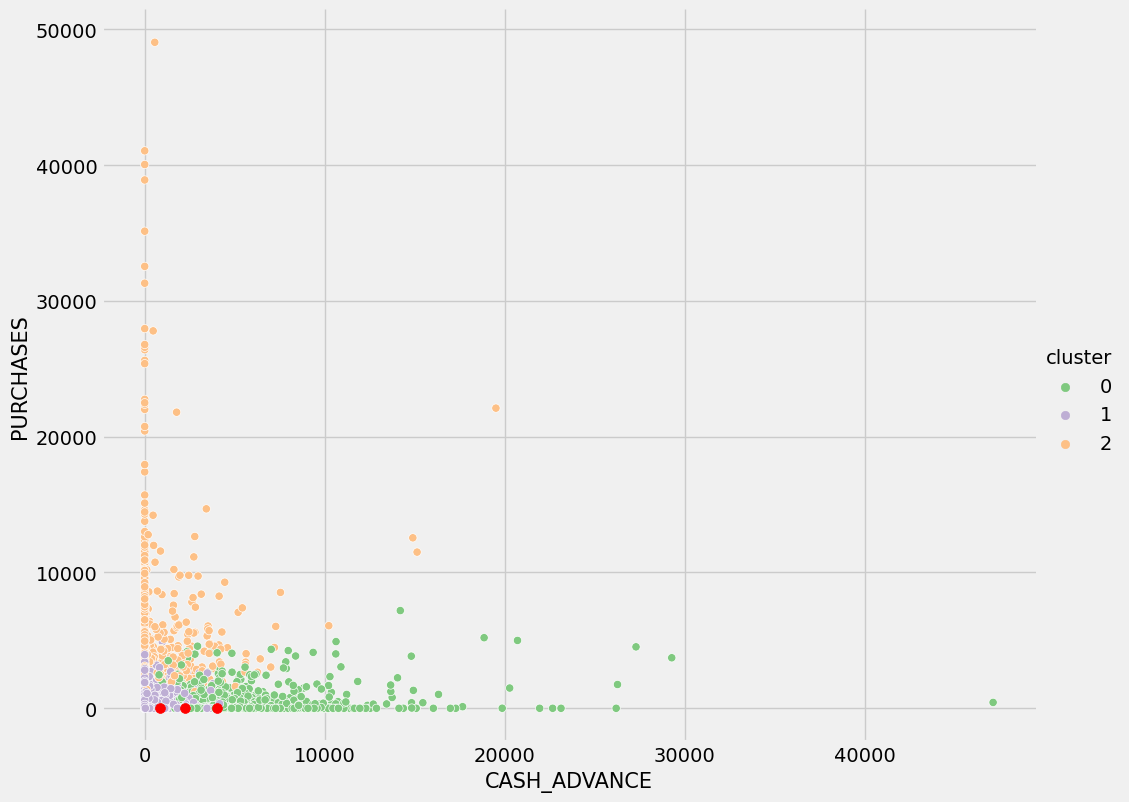

In [30]:
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
print(centroids)


sns.relplot(data = df_cluster_with_kmean ,x='CASH_ADVANCE' , y  ='PURCHASES', hue='cluster', palette='Accent' ,kind='scatter', height=8.27, aspect = 10.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("CASH_ADVANCE",fontsize=15)
plt.ylabel("PURCHASES",fontsize=15)

### Visualizing clusters on original data


[[3.45950505e+03 9.46724692e-01 1.59957463e+03 9.95575645e+02
  6.04322800e+02 2.15068567e+03 5.42336193e-01 3.18129818e-01
  3.89146486e-01 2.14576848e-01 5.85391226e+00 2.24337404e+01
  9.04866782e+03 2.96161549e+03 1.59656244e+03 1.33819784e-01
  1.17372230e+01]
 [8.81480399e+02 8.76420436e-01 6.22436620e+02 3.23163177e+02
  2.99582954e+02 5.02024330e+02 4.74368635e-01 1.58352379e-01
  3.56765199e-01 1.08715102e-01 2.29987294e+00 1.09626747e+01
  2.76931760e+03 1.03821911e+03 5.73070513e+02 1.64610694e-01
  1.14569568e+01]
 [4.87916214e+03 9.17611326e-01 1.08536936e+04 7.65950163e+03
  3.19436248e+03 5.19215982e+03 7.57564000e-01 6.03537062e-01
  6.08805682e-01 2.28296233e-01 9.27131783e+00 8.68604651e+01
  1.24848837e+04 1.80309572e+04 2.52779839e+03 3.37066930e-01
  1.18372093e+01]]


Text(52.187629095441594, 0.5, 'PURCHASES')

<Figure size 1500x800 with 0 Axes>

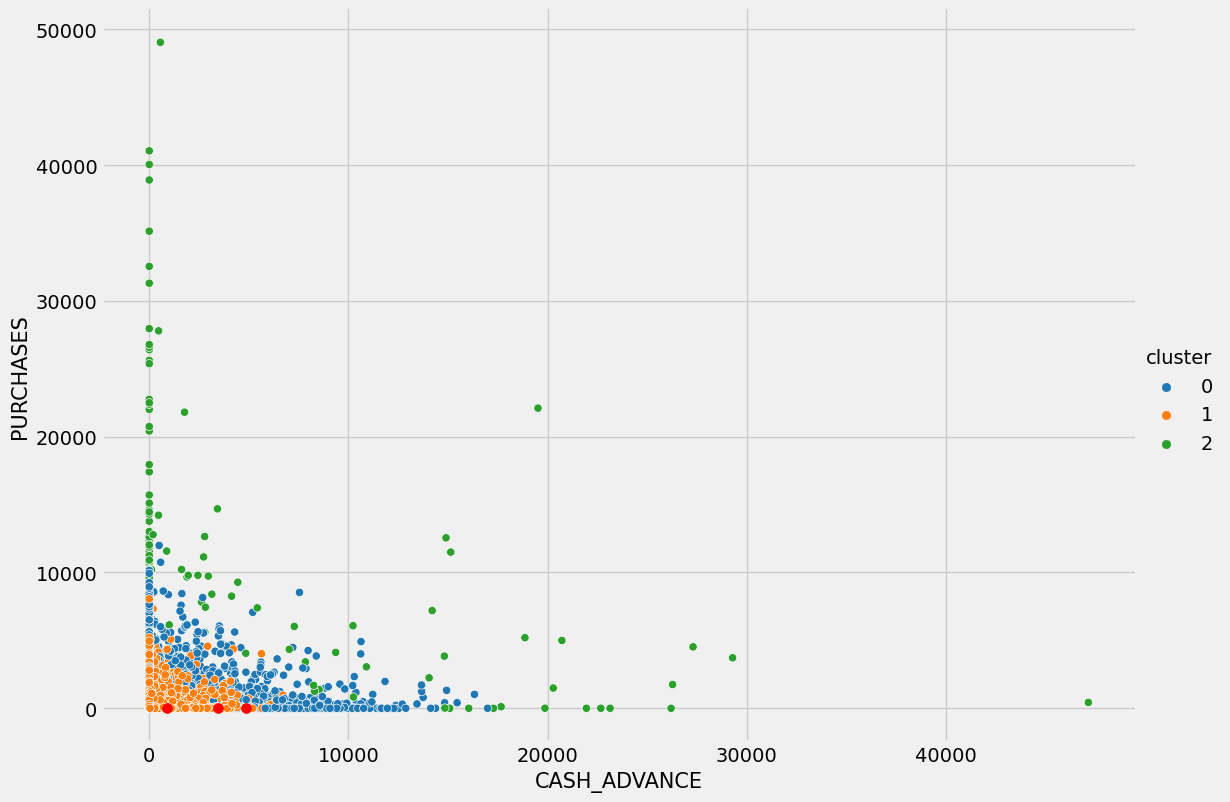

In [31]:
kmeans = KMeans(n_clusters=3,init= "random", random_state = 1).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
plt.figure(figsize=(15,8))

df_kmean = df.copy()
df_kmean['cluster'] = kmeans.labels_
sns.relplot(data = df_kmean ,x='CASH_ADVANCE' , y  ='PURCHASES', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("CASH_ADVANCE",fontsize=15)
plt.ylabel("PURCHASES",fontsize=15)

### Ploting some continues features for seeing how to clustering


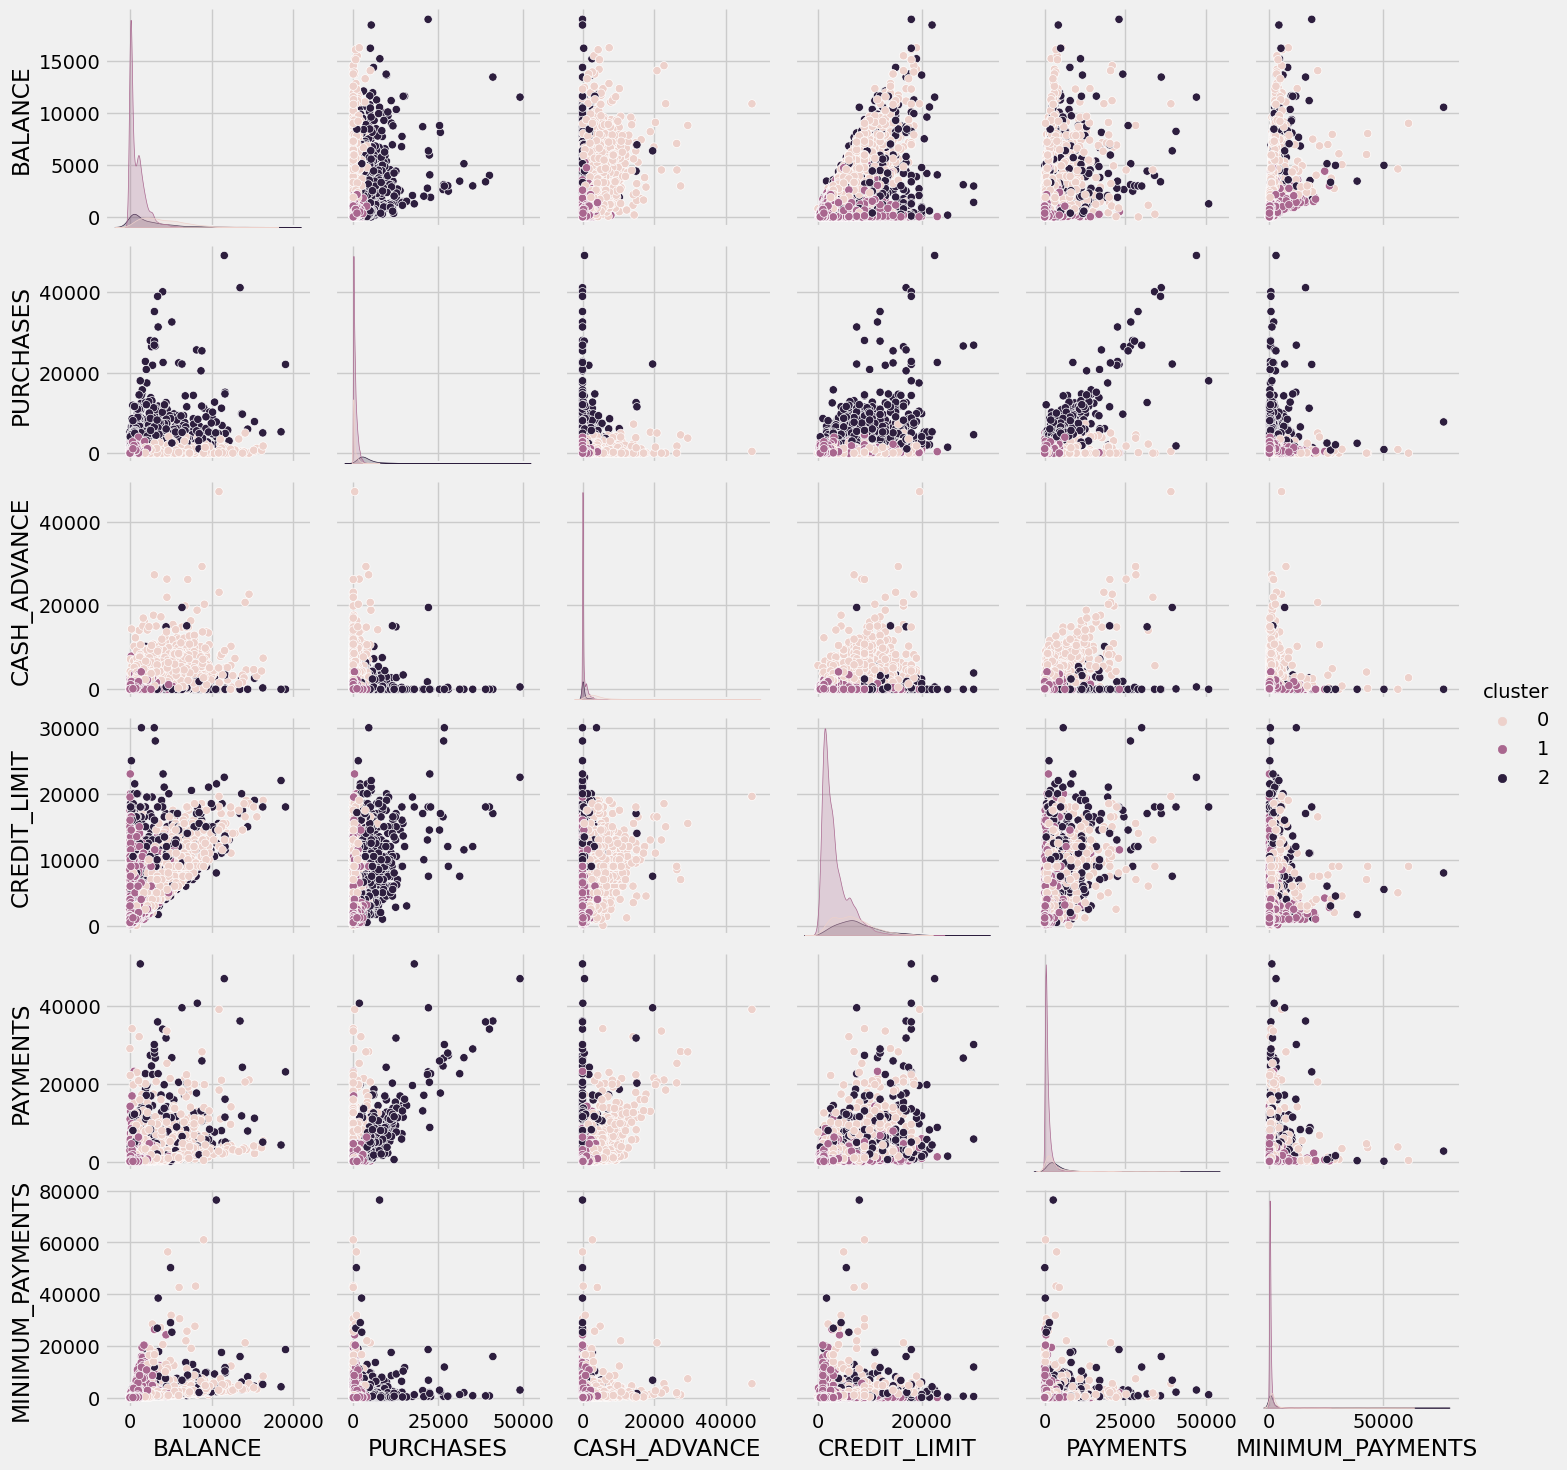

In [32]:
Best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","cluster"]
sns.pairplot( df_cluster_with_kmean[ Best_cols ], hue="cluster")

### K- medoidds

The k-medoids problem is a clustering problem similar to k-means. Both the k-means and k-medoids algorithms are partitional (breaking the dataset up into groups) and attempt to minimize the distance between points labeled to be in a cluster and a point designated as the center of that cluster. In contrast to the k-means algorithm, k-medoids chooses actual data points as centers (medoids or exemplars), and thereby allows for greater interpretability of the cluster centers than in k-means, where the center of a cluster is not necessarily one of the input data points (it is the average between the points in the cluster). Furthermore, k-medoids can be used with arbitrary dissimilarity measures, whereas k-means generally requires Euclidean distance for efficient solutions. Because k-medoids minimizes a sum of pairwise dissimilarities instead of a sum of squared Euclidean distances, it is more robust to noise and outliers than k-means.

In [33]:
!pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.6 MB/s eta 0:00:00


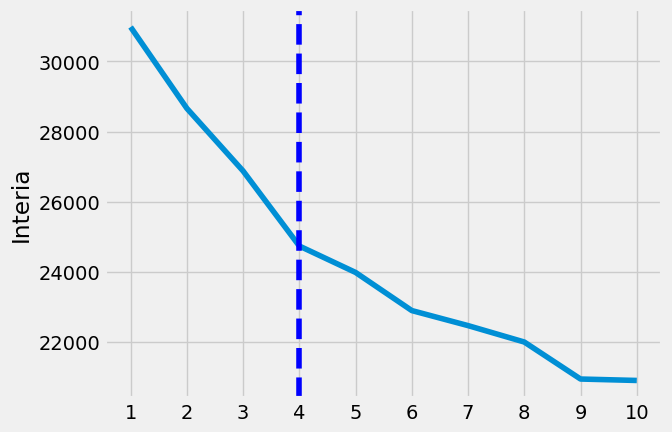

In [34]:
from sklearn_extra.cluster import KMedoids
List = []
for k in range(1,11):#this range is optional
    kmedoids = KMedoids(n_clusters=k,init= "random", random_state =5 ) 
    kmedoids.fit(scaled_features)
    List.append( kmedoids.inertia_)
    
from kneed import KneeLocator
kl = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='b', label='axvline - full height', ls='--')
plt.show()  

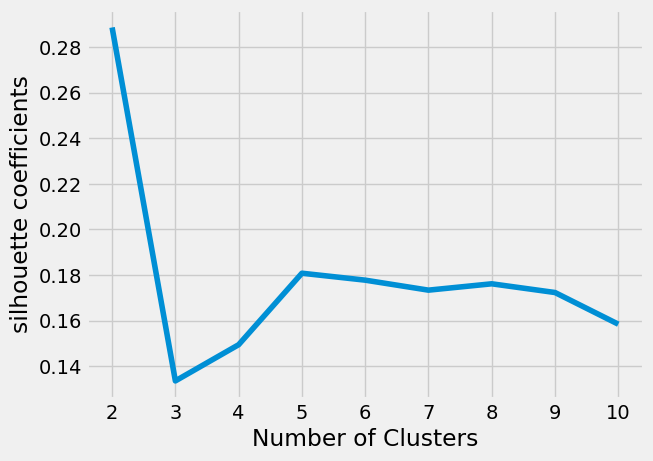

In [35]:
from sklearn_extra.cluster import KMedoids
silhouette_coefficients = []
for k in range (2,11):
    kmedoids = KMedoids(n_clusters=k,init= "random", random_state = 5) 
    kmedoids.fit(scaled_features)
    score = silhouette_score(scaled_features, kmedoids.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()

In [36]:
max(silhouette_coefficients)


0.2886451888261335

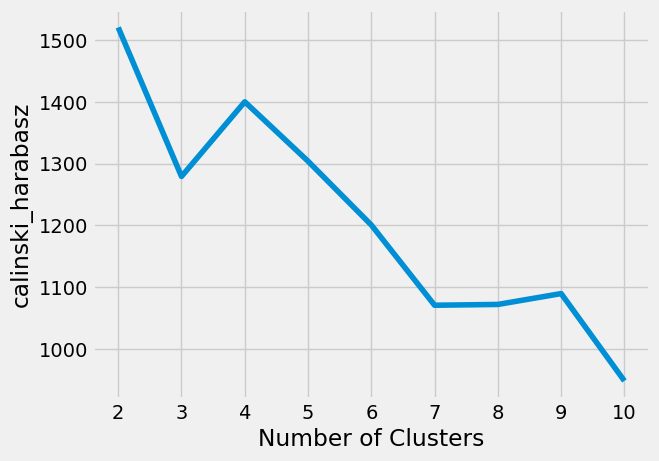

In [37]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
calinski_harabaz = []
for k in range (2,11):
    kmedoids = KMedoids(n_clusters=k,init= "random", random_state = 5) 
    kmedoids.fit(scaled_features)
    metrics.calinski_harabasz_score(scaled_features, kmedoids.labels_)
    calinski_harabaz.append(metrics.calinski_harabasz_score(scaled_features, kmedoids.labels_))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

### 2 clusters with silhouette = 0.2886451888261335, is the best for k-mediods modeling


In [38]:
# Viewing normal cluster centers
kmediods = KMedoids(n_clusters=2,init= "random", random_state = 5)
kmediods.fit(scaled_features)
labels = kmediods.labels_
cluster_centers = pd.DataFrame(data = kmediods.cluster_centers_, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.029901          0.505405  1.304550         1.233272   
1 -0.437736          0.067679 -0.337536        -0.273067   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0               0.817208    -0.468655            1.256077   
1              -0.296387    -0.335876            0.009969   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   1.813419                         0.957570   
1                  -0.408536                         0.120197   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.681953        -0.479437      0.792993     0.403907   
1               0.144032        -0.190089     -0.319045    -0.279334   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  0.550734        -0.198486         0.382859  0.355181  
1 -0.070835        -0.290617        -0.200178  0.355181

In [39]:
# Viewing real centers
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  1538.569369          1.000000   3852.37          2681.99   
1   683.971012          0.909091    294.00           145.00   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0                1170.38     0.000000                 1.0   
1                 149.00   281.669381                 0.5   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.750000                         0.750000   
1                   0.083333                         0.416667   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.000000              0.0          35.0       6000.0   
1               0.166667              2.0           7.0       3500.0   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT TENURE  
0  3386.915692       393.411779         0.272727   12.0  
1  1578.374440       174.836120         0.100000   12.0

In [40]:
# Adding cluster column to dataframe
df_cluster_with_kmediods = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_kmediods

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        1  
1     4103.032597       1072.340217          0.222222      12        1  
2      622.066742        627.284787          0.000000      12        0  
3      678.334763        244.791237          0.000000      12        1  
4     1400.057770       2407.246035          0.000000      12        1  
...           ...               ...               ...     ...      ...  
8631    58.644883         43.473717          0.000000       6        1  
86

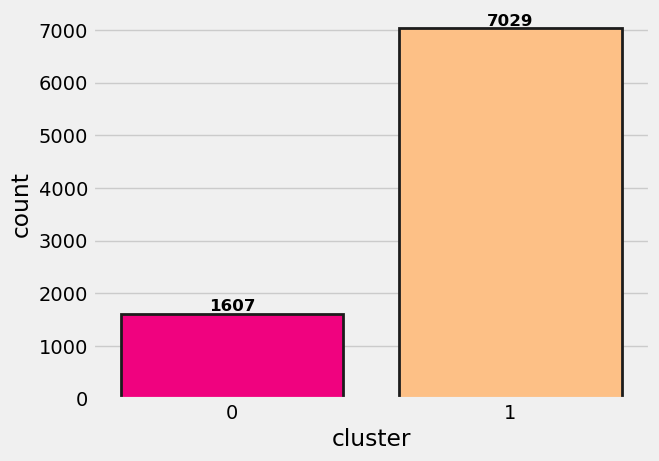

In [41]:
ax = sns.countplot(x=df_cluster_with_kmediods.cluster, palette='Accent_r', saturation=1, edgecolor = "#1c1c1c", linewidth = 2)#adding cluster column to dataframe
df_cluster_with_kmediods = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_kmediods
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.show()

### Visualizing clusters by inversing results


[[1.53856937e+03 1.00000000e+00 3.85237000e+03 2.68199000e+03
  1.17038000e+03 0.00000000e+00 1.00000000e+00 7.50000000e-01
  7.50000000e-01 0.00000000e+00 0.00000000e+00 3.50000000e+01
  6.00000000e+03 3.38691569e+03 3.93411779e+02 2.72727000e-01
  1.20000000e+01]
 [6.83971012e+02 9.09091000e-01 2.94000000e+02 1.45000000e+02
  1.49000000e+02 2.81669381e+02 5.00000000e-01 8.33330000e-02
  4.16667000e-01 1.66667000e-01 2.00000000e+00 7.00000000e+00
  3.50000000e+03 1.57837444e+03 1.74836120e+02 1.00000000e-01
  1.20000000e+01]]


Text(52.187629095441594, 0.5, 'PURCHASES')

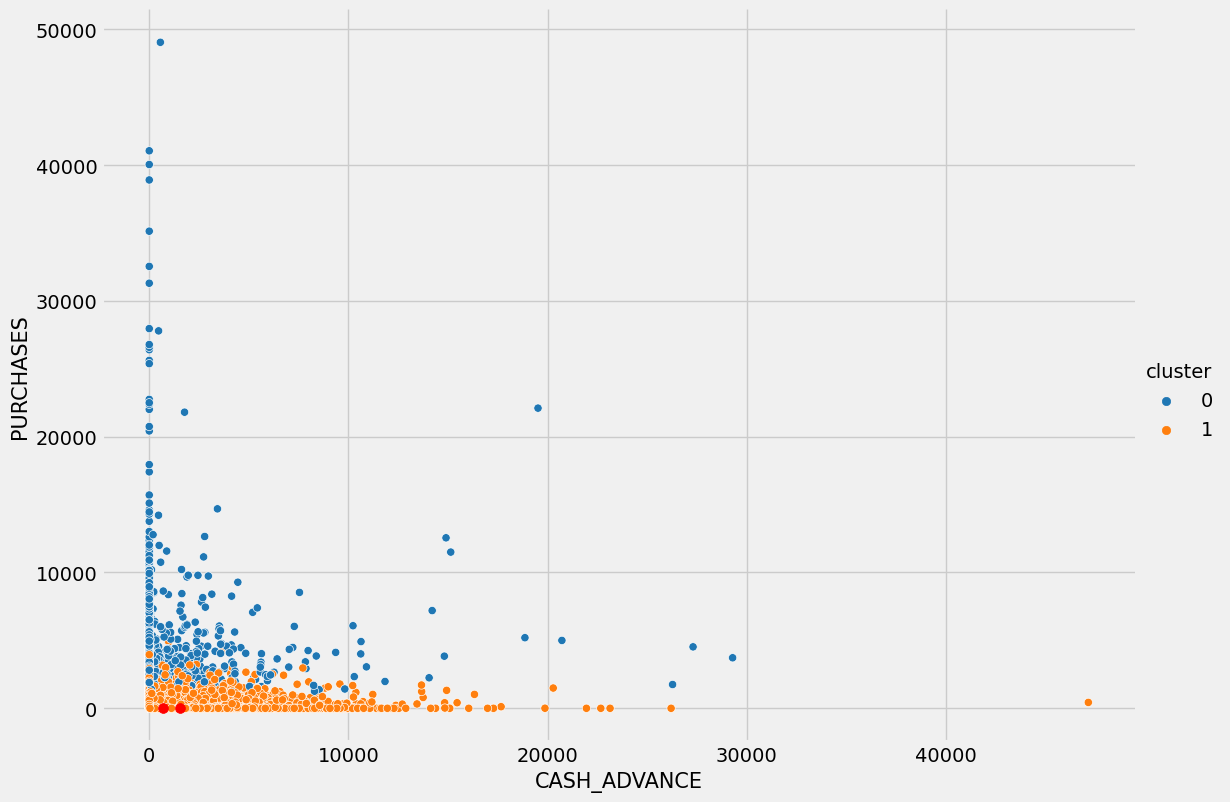

In [42]:
centroids = kmediods.cluster_centers_
centroids = scaler.inverse_transform(centroids)
print(centroids)


sns.relplot(data = df_cluster_with_kmediods ,x='CASH_ADVANCE' , y  ='PURCHASES', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("CASH_ADVANCE",fontsize=15)
plt.ylabel("PURCHASES",fontsize=15)

### Visualizing clusters on original data


[[2.99037059e+03 1.00000000e+00 1.36800000e+03 2.08000000e+02
  1.16000000e+03 1.43623824e+03 1.00000000e+00 8.33330000e-02
  1.00000000e+00 5.83333000e-01 1.40000000e+01 2.20000000e+01
  8.00000000e+03 1.68074827e+03 7.91063136e+02 0.00000000e+00
  1.20000000e+01]
 [9.69139152e+02 1.00000000e+00 2.69340000e+02 7.80000000e+01
  1.91340000e+02 7.83126600e+01 6.66667000e-01 8.33330000e-02
  5.83333000e-01 8.33330000e-02 1.00000000e+00 1.10000000e+01
  2.00000000e+03 6.41186755e+02 3.83080045e+02 0.00000000e+00
  1.20000000e+01]]


Text(50.44508101851852, 0.5, 'PURCHASES_TRX')

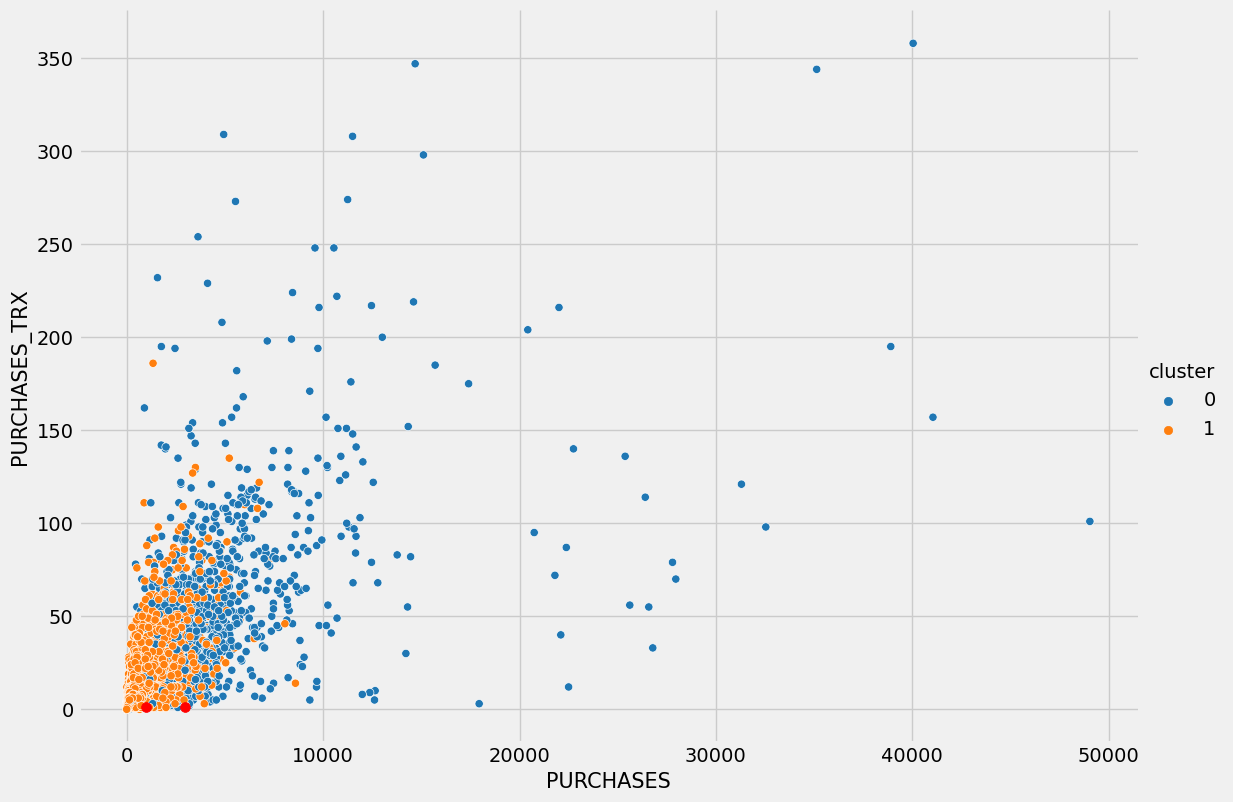

In [43]:
kmediods = KMedoids(n_clusters=2,init= "random", random_state = 5).fit(df)
centroids = kmediods.cluster_centers_
df_kmedoid = df.copy()
df_kmedoid['cluster'] = kmediods.labels_
print(centroids)

sns.relplot(data = df_kmedoid , x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

### Gaussian mixture model

Gaussian mixture models are a probabilistic model for representing normally distributed subpopulations within an overall population. Mixture models in general don't require knowing which subpopulation a data point belongs to, allowing the model to learn the subpopulations automatically. Since subpopulation assignment is not known, this constitutes a form of unsupervised learning.

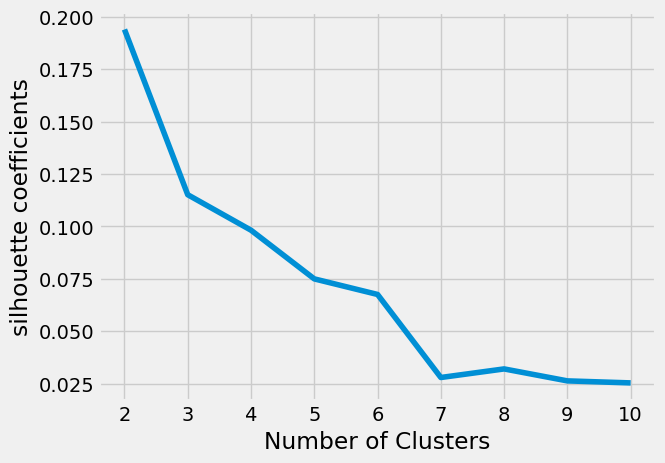

In [44]:
from sklearn.mixture import GaussianMixture
silhouette_coefficients = []
for k in range(2,11):#this range is optional
    gmm = GaussianMixture(n_components=k, random_state=1 )#each gaussian in your mixture is one component 
    gmm.fit(scaled_features)
    score = silhouette_score(scaled_features, gmm.predict(scaled_features),metric='euclidean',random_state=5)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()   

In [45]:
max(silhouette_coefficients)

0.19396703417813158

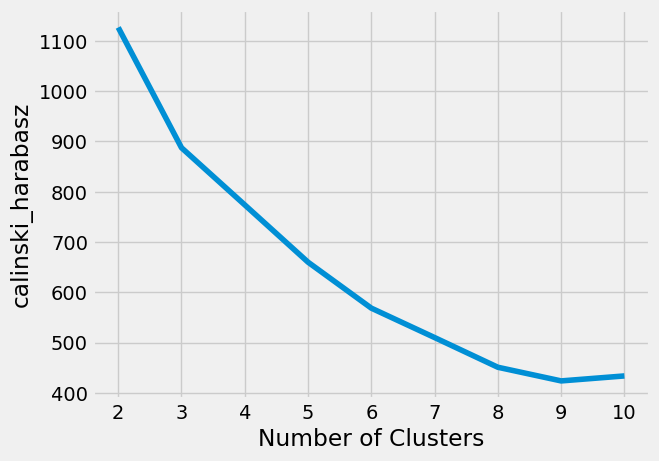

In [46]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
calinski_harabaz = []
for k in range (2,11):
    gmm = GaussianMixture(n_components=k, random_state=1 )#each gaussian in your mixture is one component
    gmm.fit(scaled_features)
    metrics.calinski_harabasz_score(scaled_features, gmm.predict(scaled_features))
    calinski_harabaz.append(metrics.calinski_harabasz_score(scaled_features, gmm.predict(scaled_features)))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()


In [47]:
max(calinski_harabaz)


1126.6074226180508

### 2 clusters with silhouette= 0.19396703417813158, is the best for gaussian mixture modeling


In [48]:
# In gaussian method, we don't have centers, we have mean for each cluster
# view normal cordinates means of clusters(in gaussian we can show mean, instead center)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=1 )
gmm.fit(scaled_features)
labels = gmm.predict(scaled_features)
cluster_means = pd.DataFrame(data = gmm.means_, columns = [df.columns])
cluster_means

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  0.343339          0.310932  0.632536         0.522483   
1 -0.181042         -0.163954 -0.333536        -0.275505   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0               0.535672     0.146721            0.669942   
1              -0.282459    -0.077366           -0.353260   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.808218                         0.462140   
1                  -0.426173                        -0.243686   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.070432         0.013304      0.714165     0.475124   
1               0.037139        -0.007015     -0.376579    -0.250532   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  0.544817         0.333071         0.141668  0.200428  
1 -0.287282        -0.175628        -0.074701 -0.105685

In [49]:
# view real cordinates means of clusters(in gaussian we can show mean, instead center)
cluster_means = scaler.inverse_transform(cluster_means)
cluster_means = pd.DataFrame(data = cluster_means, columns = [df.columns])
cluster_means

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  2320.674499          0.959611  2396.129367      1484.872746   
1  1221.859758          0.860984   302.667366       140.893353   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             912.157698  1305.419684            0.764814   
1             161.774013   830.056755            0.354255   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.448403                         0.552784   
1                   0.078041                         0.271816   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.123393         3.405880     33.015203  6260.583245   
1               0.145098         3.265427      5.551356  3605.385637   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  3369.701410      1654.491120         0.201273  11.797133  
1   948.591264       447.640478         0.137173  11.395847

In [50]:
#adding cluster column to dataframe
df_cluster_with_gmm = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_gmm

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        1  
1     4103.032597       1072.340217          0.222222      12        1  
2      622.066742        627.284787          0.000000      12        0  
3      678.334763        244.791237          0.000000      12        1  
4     1400.057770       2407.246035          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8631    58.644883         43.473717          0.000000       6        1  
86

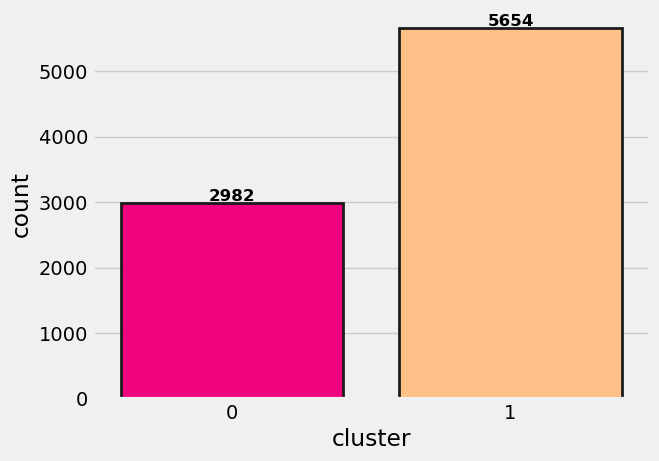

In [51]:
ax = sns.countplot(x=df_cluster_with_gmm.cluster, palette='Accent_r', saturation=1, edgecolor = "#1c1c1c", linewidth = 2)#adding cluster column to dataframe
df_cluster_with_gmm = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_gmm
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.show()

### Visualizing clusters by inversing results

cluster means:
 [[2.32067450e+03 9.59611042e-01 2.39612937e+03 1.48487275e+03
  9.12157698e+02 1.30541968e+03 7.64813769e-01 4.48403459e-01
  5.52784326e-01 1.23392522e-01 3.40587966e+00 3.30152032e+01
  6.26058325e+03 3.36970141e+03 1.65449112e+03 2.01273340e-01
  1.17971331e+01]
 [1.22185976e+03 8.60984281e-01 3.02667366e+02 1.40893353e+02
  1.61774013e+02 8.30056755e+02 3.54254740e-01 7.80414928e-02
  2.71816303e-01 1.45098012e-01 3.26542743e+00 5.55135617e+00
  3.60538564e+03 9.48591264e+02 4.47640478e+02 1.37173031e-01
  1.13958472e+01]]


Text(50.44508101851852, 0.5, 'PURCHASES_TRX')

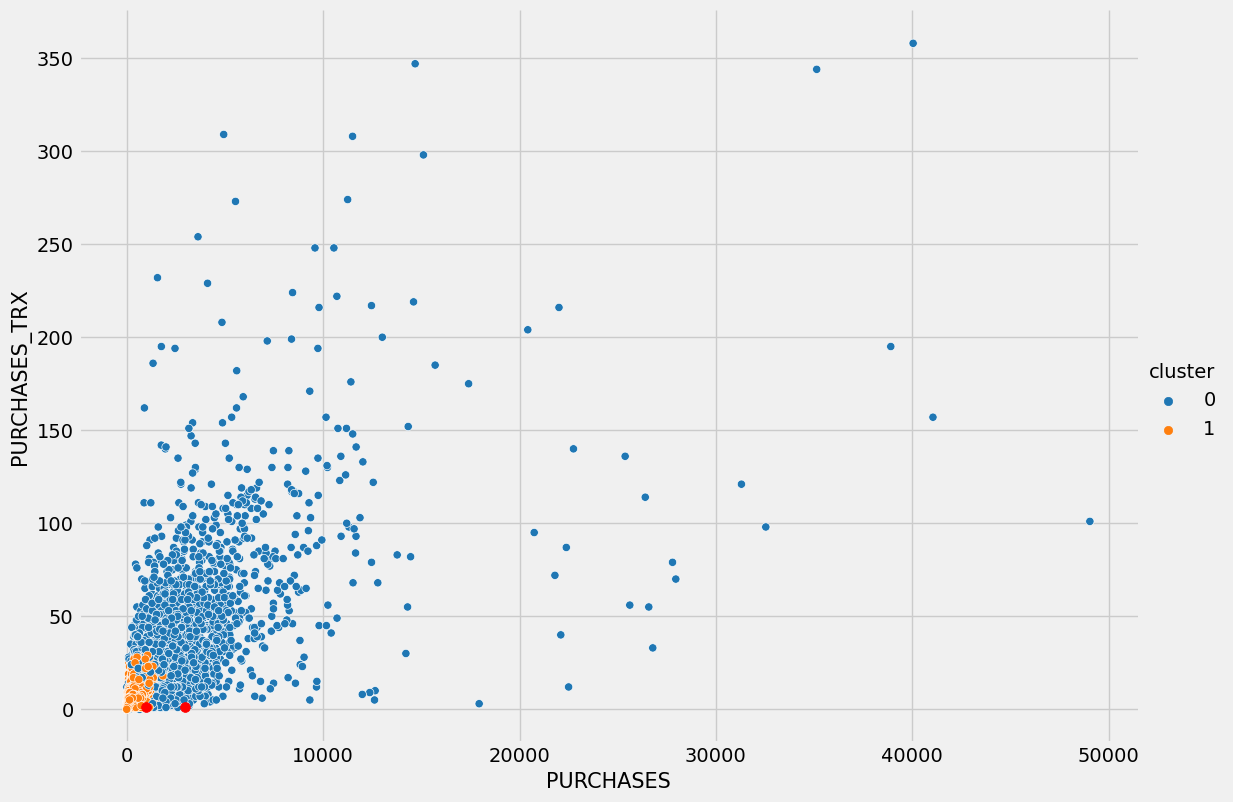

In [52]:
cluster_means = gmm.means_#for gaussian, we don't have centers,we have mean 
cluster_means = scaler.inverse_transform(cluster_means)
print("cluster means:\n",cluster_means)

sns.relplot(data = df_cluster_with_gmm,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

### Visualizing clusters on original data


cluster means without normalize:
 [[3.60152112e+03 9.60904661e-01 3.26585279e+03 2.00299994e+03
  1.26514951e+03 2.68247639e+03 6.29571870e-01 3.33868849e-01
  5.18081744e-01 2.27337414e-01 8.55188716e+00 4.13901245e+01
  7.23016751e+03 5.41442341e+03 3.26833023e+03 1.54980699e-01
  1.17464571e+01]
 [1.28782016e+03 8.84714726e-01 6.74406920e+02 3.85848539e+02
  2.88558381e+02 7.29653960e+02 4.75072072e-01 1.85860059e-01
  3.45434195e-01 1.23544880e-01 2.49323795e+00 1.09036573e+01
  4.09779188e+03 1.21574132e+03 4.87644279e+02 1.59980937e-01
  1.15011646e+01]]


Text(50.44508101851852, 0.5, 'PURCHASES_TRX')

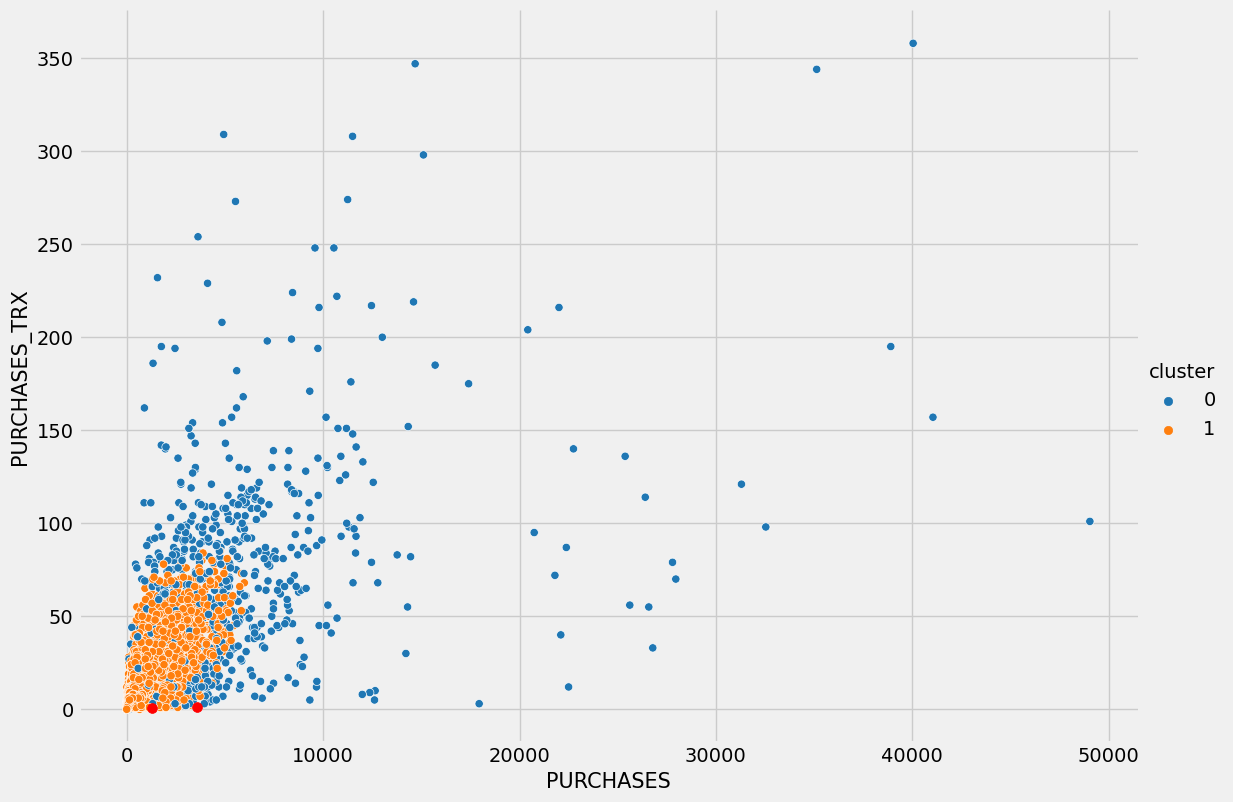

In [53]:
gmm = GaussianMixture(n_components=2, random_state=1).fit(df)
cluster_means = gmm.means_
df_gmm = df.copy()
df_gmm['cluster'] = gmm.predict(df)
print("cluster means without normalize:\n",cluster_means)

sns.relplot(data = df_gmm , x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(cluster_means[:, 0], cluster_means[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

### Mini-batch K-means

 It is a variation of the traditional K-means clustering algorithm that is designed to handle large datasets. In traditional K-means, the algorithm processes the entire dataset in each iteration, which can be computationally expensive for large datasets.

Mini-batch K-means addresses this issue by processing only a small subset of the data, called a mini-batch, in each iteration. The mini-batch is randomly sampled from the dataset, and the algorithm updates the cluster centroids based on the data in the mini-batch. This allows the algorithm to converge faster and use less memory than traditional K-means.

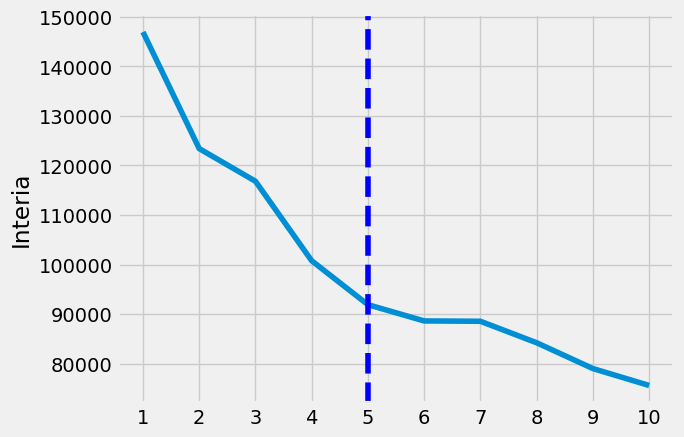

In [54]:
from sklearn.cluster import MiniBatchKMeans
List = []
for k in range(1,11):#this range is optional
    minibatch = MiniBatchKMeans(n_clusters=k , random_state =42, batch_size=50) 
    minibatch.fit(scaled_features)
    List.append(minibatch.inertia_)
from kneed import KneeLocator
kl = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='b', label='axvline - full height', ls='--')
plt.show()    

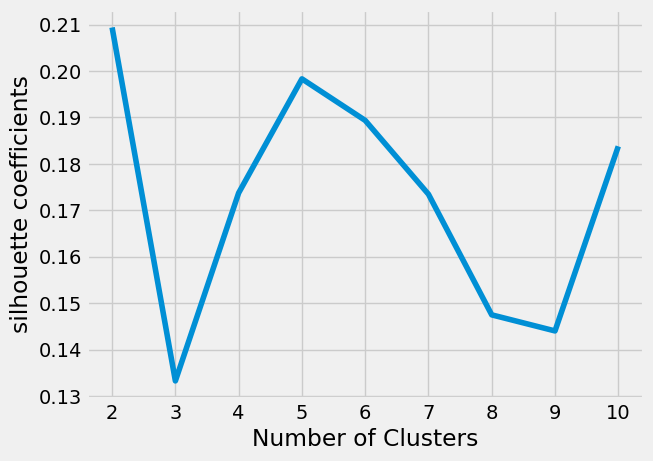

In [55]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range (2,11):
    minibatch = MiniBatchKMeans(n_clusters=k, random_state =42, batch_size=50) 
    minibatch.fit(scaled_features)
    score = silhouette_score(scaled_features, minibatch.predict(scaled_features))
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show() 

In [56]:
max(silhouette_coefficients)


0.2093768793881529

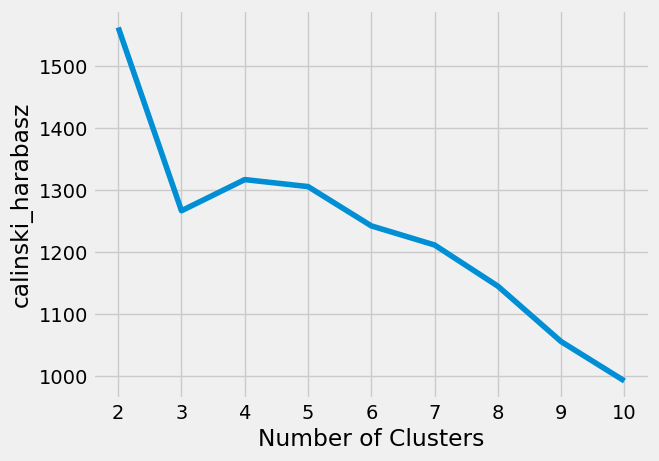

In [57]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
calinski_harabaz = []
for k in range (2,11):
    minibatch = MiniBatchKMeans(n_clusters=k, init='random' , random_state =42, batch_size=50)
    minibatch.fit(scaled_features)
    score = metrics.calinski_harabasz_score(scaled_features, minibatch.labels_)
    calinski_harabaz.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

In [58]:
max(calinski_harabaz)


1562.4996268588484

### 3 clusters with silhouette score = 0.2093768793881529, is the best for mini batch k-mean modeling

In [59]:
# Viewing cluster centers (scaled centers)
from sklearn.cluster import MiniBatchKMeans
minibatch = MiniBatchKMeans(n_clusters=3, random_state =42, batch_size=50)
minibatch.fit(scaled_features)
labels = minibatch.labels_
cluster_centers = pd.DataFrame(data = minibatch.cluster_centers_, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.068634          0.268122 -0.295043        -0.246478   
1  0.236399          0.404125  0.974490         0.747515   
2 -0.692596         -1.751316 -0.346145        -0.256385   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.244816     0.000890           -0.221989   
1               0.929378     0.048223            1.104311   
2              -0.346861    -0.340285           -0.680510   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.307322                        -0.182342   
1                   1.222501                         0.959325   
2                  -0.430483                        -0.583899   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.102310         0.094648     -0.310965    -0.302578   
1              -0.089805         0.034203      1.335417     0.795143   
2              -0.459079        -0.370932     -0.440483    -0.201681   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.208108        -0.046014        -0.219821 -0.058019  
1  0.712212         0.208021         0.559677  0.278386  
2 -0.262652        -0.291746         0.240964  0.215817

In [60]:
# Viewing real centers
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  1457.405123          0.950720   386.080392       189.780613   
1  2096.586643          0.978966  3137.135638      1863.873557   
2   149.923619          0.531313   275.342788       173.094519   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             196.299779   996.063740            0.406927   
1            1273.262081  1096.473391            0.939104   
2             102.705000   272.317402            0.222946   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.113701                         0.296236   
1                   0.572703                         0.750699   
2                   0.076748                         0.136388   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.158248         3.968137      7.203431  3414.950980   
1               0.119483         3.550336     48.657718  7431.543624   
2               0.044971         0.750000      3.942308  3784.134615   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  1178.958918       755.139192         0.094181  11.458333  
1  3856.760198      1357.820637         0.325110  11.899329  
2  1020.256035       172.157821         0.230690  11.817308

In [61]:
# Adding cluster column to dataframe
df_cluster_with_minibatch = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_minibatch

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        2  
1     4103.032597       1072.340217          0.222222      12        0  
2      622.066742        627.284787          0.000000      12        0  
3      678.334763        244.791237          0.000000      12        0  
4     1400.057770       2407.246035          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8631    58.644883         43.473717          0.000000       6        2  
86

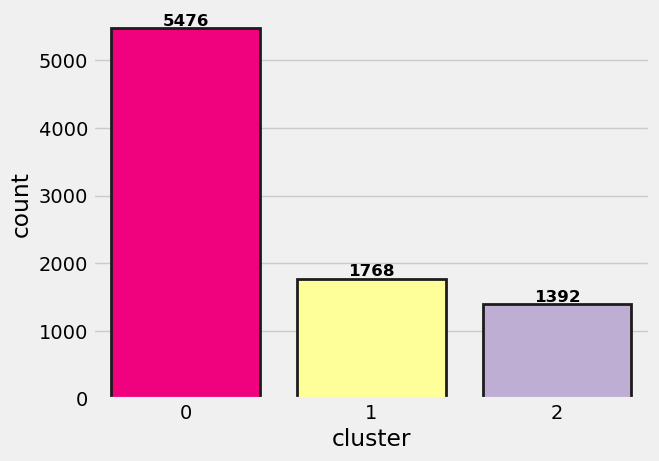

In [62]:
ax = sns.countplot(x=df_cluster_with_minibatch.cluster, palette='Accent_r', saturation=1, edgecolor = "#1c1c1c", linewidth = 2)#adding cluster column to dataframe
df_cluster_with_minibatch = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_minibatch
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.show()

### Visualizing by inversing normalize data


[[1.45740512e+03 9.50719931e-01 3.86080392e+02 1.89780613e+02
  1.96299779e+02 9.96063740e+02 4.06926922e-01 1.13701152e-01
  2.96235654e-01 1.58248343e-01 3.96813725e+00 7.20343137e+00
  3.41495098e+03 1.17895892e+03 7.55139192e+02 9.41809387e-02
  1.14583333e+01]
 [2.09658664e+03 9.78965839e-01 3.13713564e+03 1.86387356e+03
  1.27326208e+03 1.09647339e+03 9.39104148e-01 5.72703309e-01
  7.50698745e-01 1.19483416e-01 3.55033557e+00 4.86577181e+01
  7.43154362e+03 3.85676020e+03 1.35782064e+03 3.25109919e-01
  1.18993289e+01]
 [1.49923619e+02 5.31313221e-01 2.75342788e+02 1.73094519e+02
  1.02705000e+02 2.72317402e+02 2.22945760e-01 7.67482019e-02
  1.36387904e-01 4.49713077e-02 7.50000000e-01 3.94230769e+00
  3.78413462e+03 1.02025604e+03 1.72157821e+02 2.30690173e-01
  1.18173077e+01]]


Text(50.44508101851852, 0.5, 'PURCHASES_TRX')

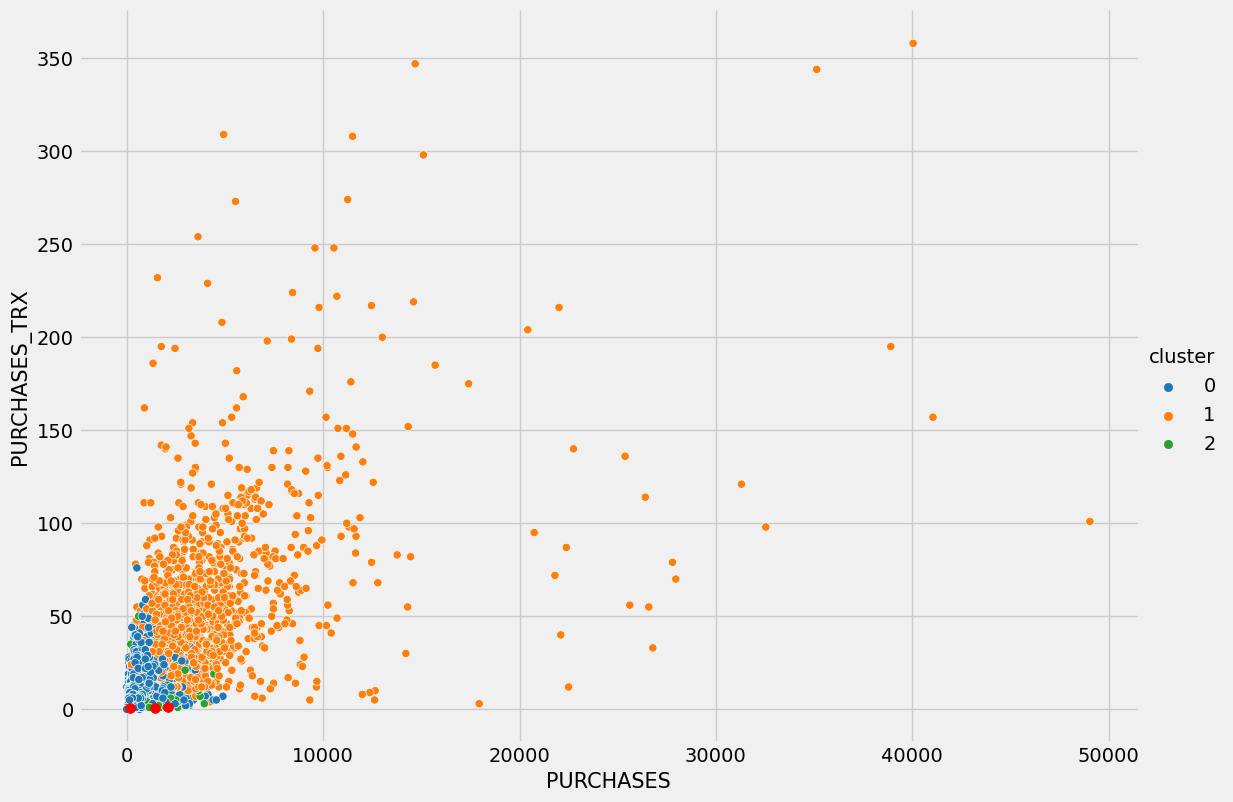

In [63]:
centroids = minibatch.cluster_centers_
centroids = scaler.inverse_transform(centroids)
print(centroids)


sns.relplot(data = df_cluster_with_minibatch ,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

Text(50.44508101851852, 0.5, 'PURCHASES_TRX')

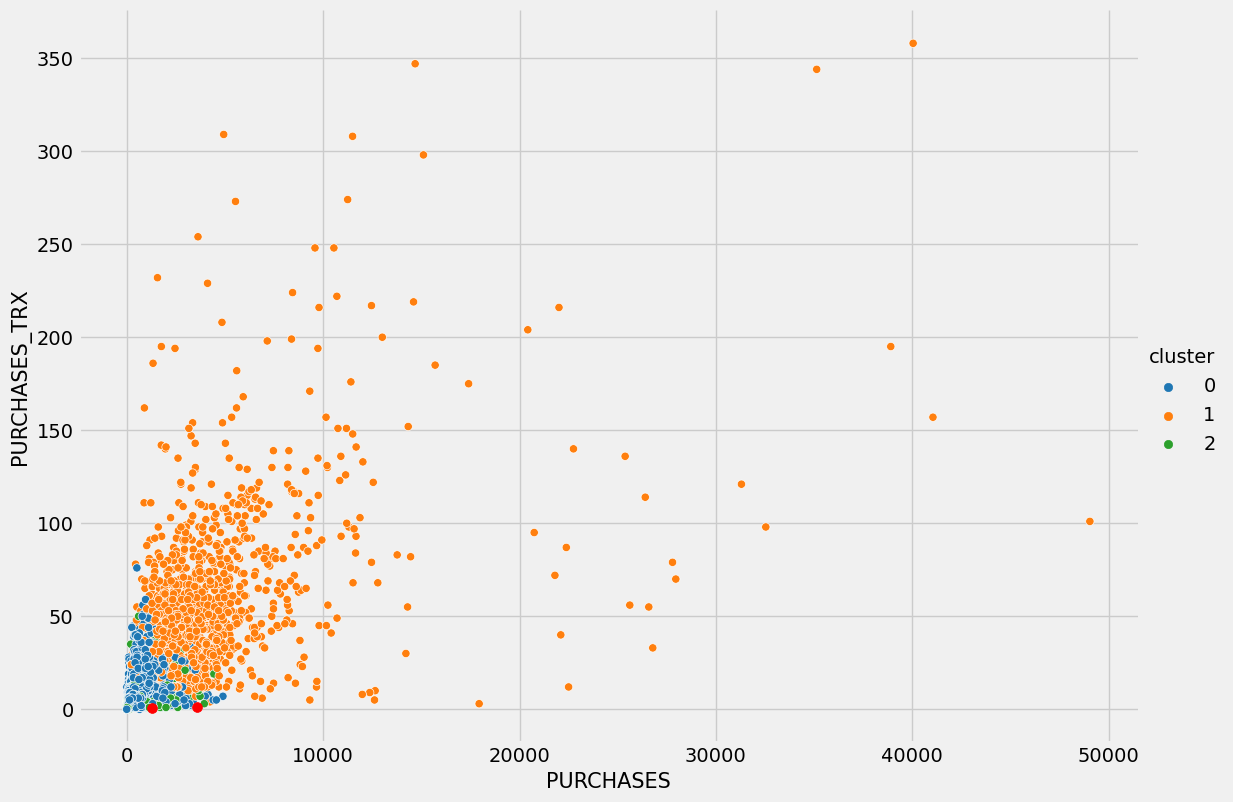

In [64]:
sns.relplot(data = df_cluster_with_minibatch , x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(cluster_means[:, 0], cluster_means[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

### Visualizing clusters on original data


[[9.18600827e+02 8.84867750e-01 6.25560463e+02 3.24550688e+02
  3.01128048e+02 5.68978110e+02 4.64479989e-01 1.59457279e-01
  3.48874596e-01 1.10303350e-01 2.43053817e+00 1.16708385e+01
  2.74080100e+03 1.04650401e+03 6.76900015e+02 1.64526304e-01
  1.14931164e+01]
 [4.16318921e+03 9.28977281e-01 5.36414937e+03 3.54112406e+03
  1.82302531e+03 6.01442767e+03 5.96117406e-01 4.34287094e-01
  4.73755437e-01 3.11553063e-01 1.06562500e+01 4.22500000e+01
  1.04906250e+04 1.32565624e+04 1.60065263e+03 3.18127656e-01
  1.18125000e+01]
 [3.06402213e+03 9.12662005e-01 1.43895566e+03 8.66509361e+02
  5.72446301e+02 1.85119161e+03 5.55493279e-01 3.22835648e-01
  4.07128365e-01 2.06531041e-01 5.50684932e+00 2.30000000e+01
  9.60936073e+03 2.66075647e+03 1.26056541e+03 1.81823941e-01
  1.17351598e+01]]


Text(50.44508101851852, 0.5, 'PURCHASES_TRX')

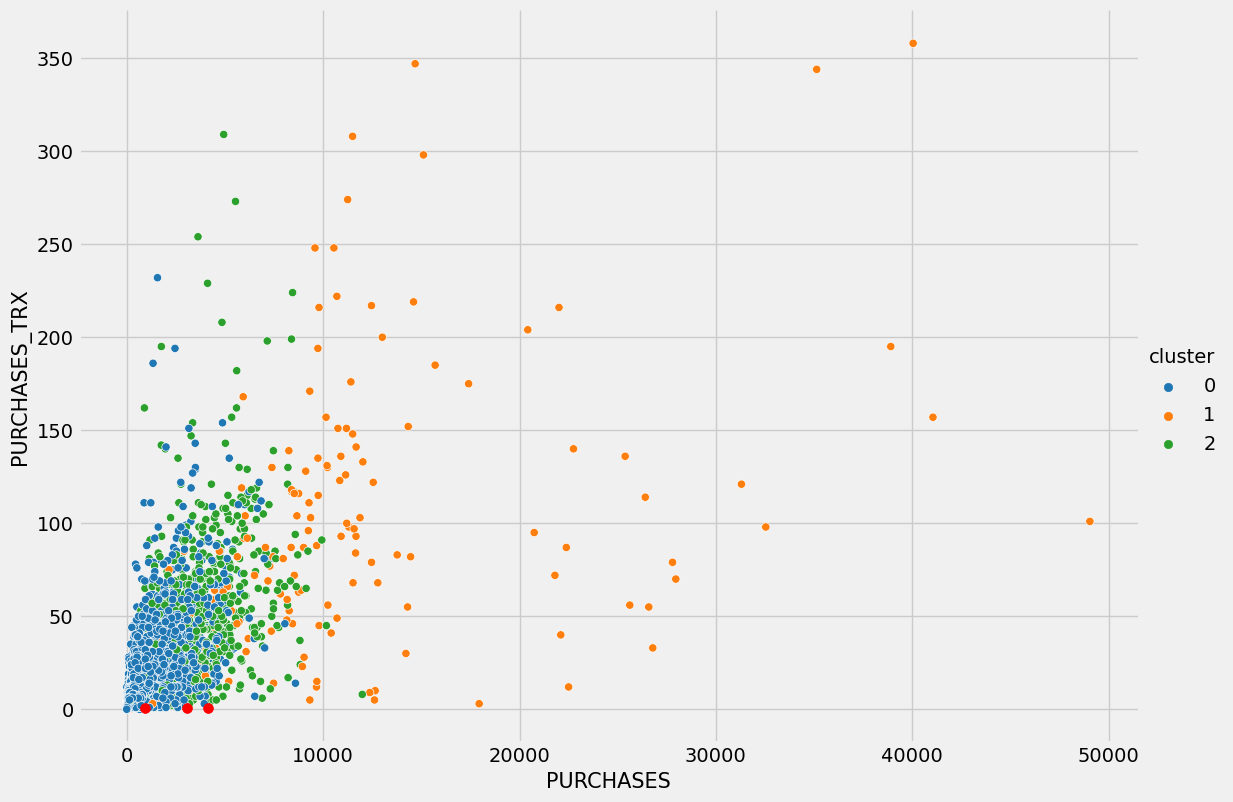

In [65]:
minibatch_df = minibatch.fit(df)
centroids = minibatch_df.cluster_centers_
print(centroids)

df_minibatch = df.copy()
df_minibatch['cluster'] = minibatch_df.labels_

sns.relplot(data = df_minibatch ,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

Text(52.187629095441594, 0.5, 'CASH_ADVANCE')

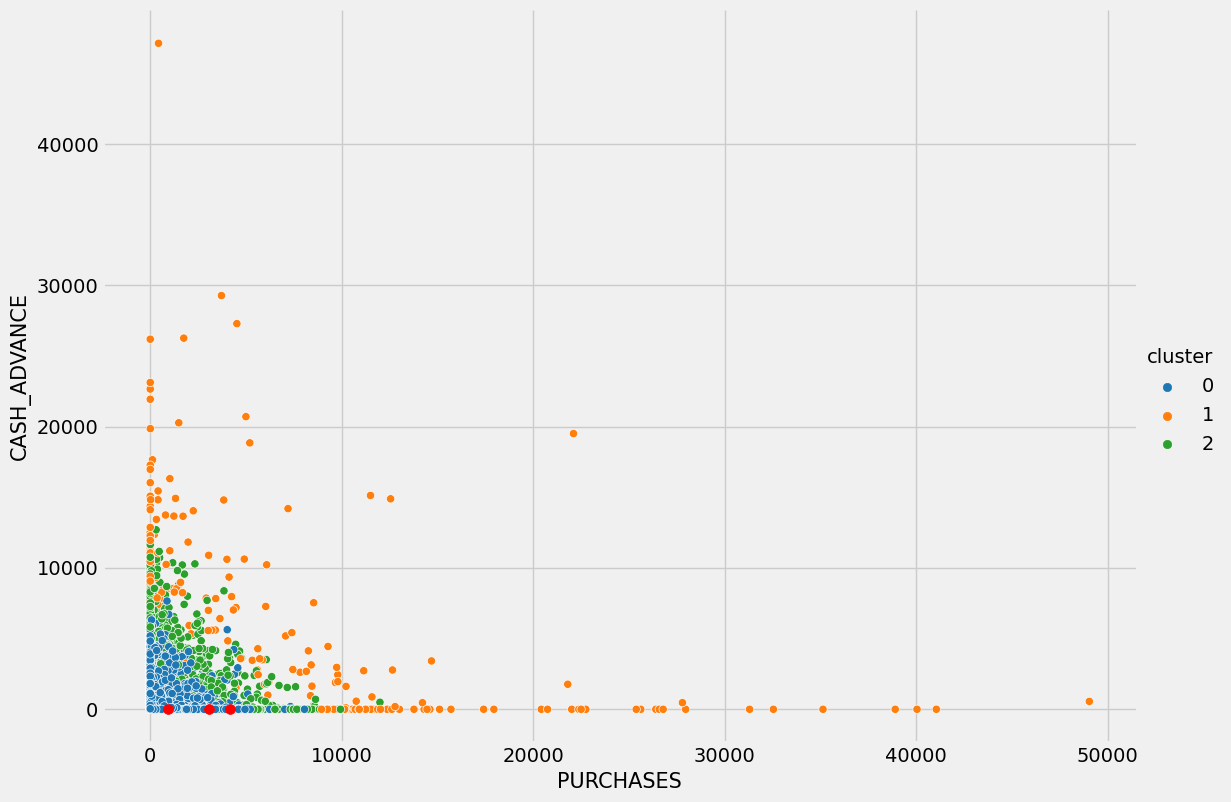

In [66]:
sns.relplot(data = df_minibatch ,x='PURCHASES' , y  ='CASH_ADVANCE', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("CASH_ADVANCE",fontsize=15)

### Evaluating all models in one plot

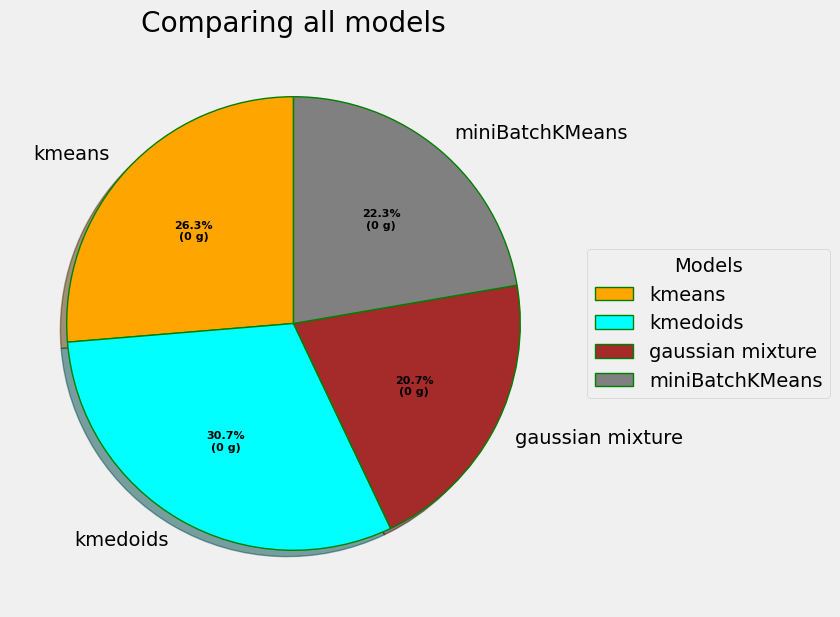

In [67]:
Models = ['kmeans','kmedoids','gaussian mixture','miniBatchKMeans']
silhouette_coefficients=[0.24709726016009056,0.2886451888261335,0.19396703417813158,0.2093768793881529]

colors = ( "orange", "cyan", "brown","grey")
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(silhouette_coefficients,
                                  autopct = lambda pct: func(pct, silhouette_coefficients),
                                  labels = Models,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
ax.legend(wedges, Models,
          title ="Models",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Comparing all models")
 

plt.show()

### Based on what we have seen, the K Medoids method is by far the most effective

In [68]:
df_cluster_with_kmediods

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        1  
1     4103.032597       1072.340217          0.222222      12        1  
2      622.066742        627.284787          0.000000      12        0  
3      678.334763        244.791237          0.000000      12        1  
4     1400.057770       2407.246035          0.000000      12        1  
...           ...               ...               ...     ...      ...  
8631    58.644883         43.473717          0.000000       6        1  
86

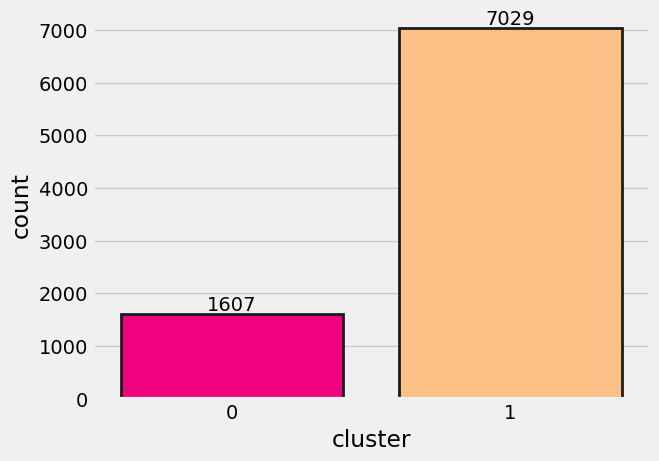

In [69]:
# Counting the number of clusters
ax = sns.countplot(data=df_cluster_with_kmediods, x='cluster', palette='Accent_r', saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
for cont in ax.containers:
    ax.bar_label(cont)

### In sum up, the most people are placed in class 1.


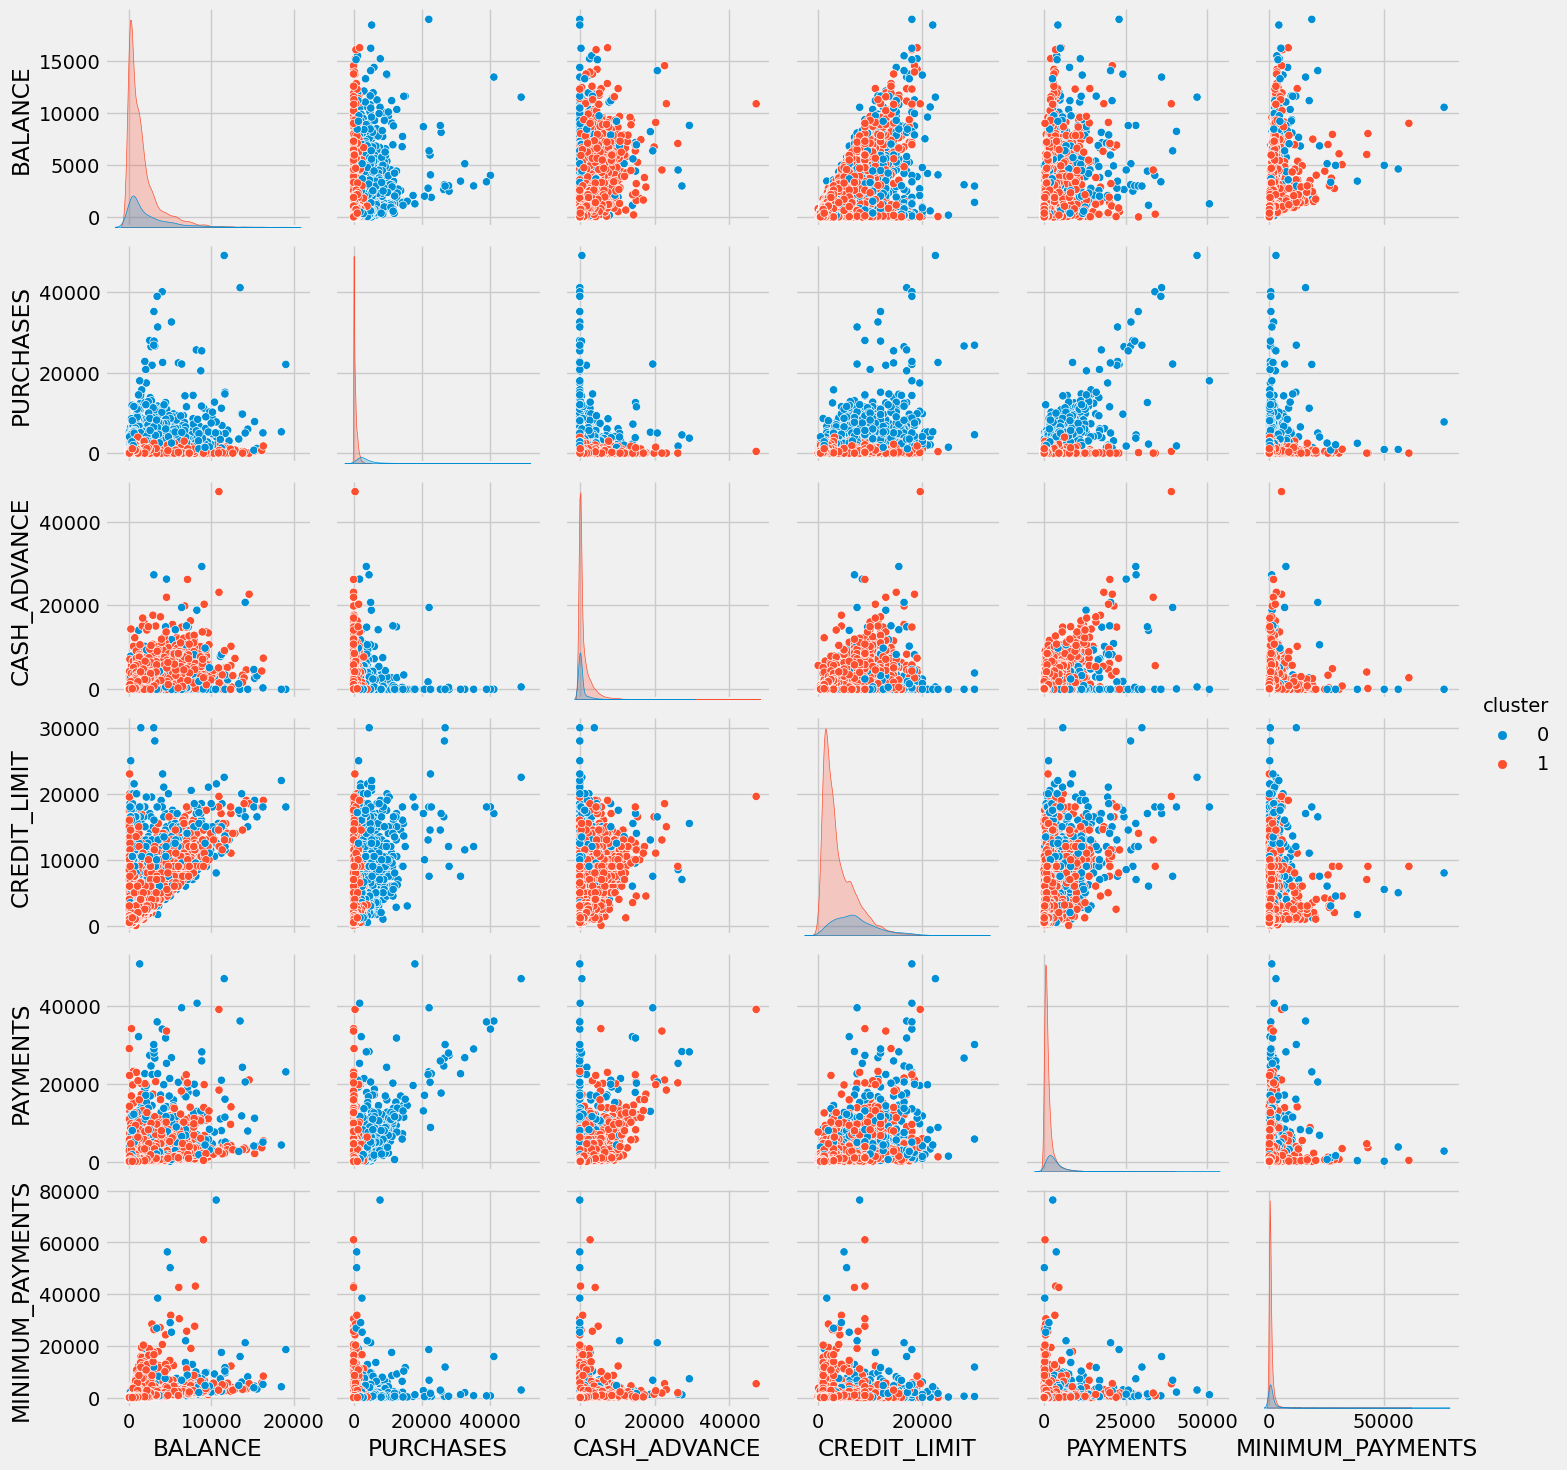

In [70]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","cluster"]
sns.pairplot( df_cluster_with_kmediods[ best_cols ], hue="cluster")